In [1]:

import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Path to FITRES file
fitres_file = 'BBC1D_fixgamma0.FITRES'

# Display the first few lines of the file to understand its structure
with open(fitres_file, 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # Print the first 10 lines
        print(line)

# Reading the file
df1 = pd.read_csv(fitres_file, sep='\s+', comment='#')

# Display the DataFrame
print(df1.head())

# VERSION_PHOTOMETRY(DATA):     DES5YR_SMP 

# VERSION_PHOTOMETRY(BIASCOR):   

# ISDATA_REAL:   1 

# SNANA_VERSION: v11_05n-95-g0136620 

# BBC_VERSION:   4 



# MIGRAD

# NCALL_FCN: 4641 

# CPU: 0.03 minutes

# MU-RESIDUAL NOTE: MURES = MU-(MUMODEL+M0DIF) 

  VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
0       SN:  1562098  1562098        10     0    X2              3   
1       SN:  1702083  1702083        10     0    C2              3   
2       SN:  1435094  1435094        10     0    C3              3   
3       SN:  1309227  1309227        10     0    C3              3   
4       SN:  1324542  1324542        10     1    C2              3   

   ERRFLAG_FIT     zHEL  zHELERR  ...  CHI2  biasCor_nevt  biasCor_mu  \
0            0  0.57747    0.001  ...  1.71             0     -0.0512   
1            0  0.38932    0.001  ...  0.47             0     -0.0050   
2            0  1.01778    0.001  ...  2.42             0     -0.0697   
3            0  0.92649 

In [3]:
#dataframe 2 to extract the value of logOII
file_path2 = 'ozdes_oII.csv'

df2 = pd.read_csv(file_path2)

df2.head()

,CID,ID_Host,SPECZ,LOG_OII,LOG_OII_ERR,HOST_LOGMASS,HOST_LOGMASS_ERR,U-R
0,1644213,SVA1_COADD-2970925362,0.54622,0.534193,0.489119,10.46,0.04,1.29
1,1321492,SVA1_COADD-2971237980,0.55583,0.878993,0.558391,10.43,0.04,1.29
2,1896213,SVA1_COADD-2939364126,0.68757,0.744288,0.406872,11.08,0.03,1.49
3,1266255,SVA1_COADD-2939020332,0.29461,1.360995,0.308512,10.49,0.01,1.59
4,1279501,SVA1_COADD-2938843264,0.56655,1.072554,0.226491,10.26,0.04,1.17


In [4]:
#dataframe foundation 
#dataframe foundation 
file_path_fond1 = 'Foundation_Master_File.csv'
dff1 = pd.read_csv(file_path_fond1)
dff1_main= dff1[['mu_res_x1_c','SN','OII_EW','zHD', 'mu_err_x1_c']]
print(dff1_main)
# Drop rows where 'OII_EW' is NaN
dff1_main_non_nan = dff1_main.dropna(subset=['OII_EW'])
#find median redshift
redshift=dff1_main_non_nan['zHD']
med_redshift=np.median(redshift)
file_path_fond2 = 'FN_Host_Properties-3.csv'
dff2 = pd.read_csv(file_path_fond2)
dff2.head()

     mu_res_x1_c           SN    OII_EW      zHD  mu_err_x1_c
0       0.022315    SN2016coj       NaN  0.00570     0.482154
1      -0.024013       2018gv       NaN  0.00602     0.348138
2       0.278647       2019np       NaN  0.00648     0.320006
3      -0.103493      2017erp       NaN  0.00677     0.369122
4       0.010428  ASASSN-15so       NaN  0.00857     0.264834
..           ...          ...       ...      ...          ...
174     0.248538    Gaia16acv       NaN  0.07859     0.140942
175    -0.208416      PS15bzz  0.955859  0.07931     0.142165
176    -0.016114    SN2016glp       NaN  0.08410     0.218094
177    -0.093876    SN2016grz       NaN  0.08704     0.213306
178     0.130085     iPTF17dz       NaN  0.09293     0.491364

[179 rows x 5 columns]


,Unnamed: 0,Names,Redshift,SN_RA,SN_DEC,HOST_RA,HOST_DEC,LOGMASS,Color,HR,HR_err
0,0,SN2016coj,0.00570,182.028,65.1772,182.024310,65.174310,10.769,1.298282,0.019315,0.483672
1,1,2018gv,0.00602,121.394,-11.4379,121.408500,-11.427030,10.094,1.295473,-0.027013,0.350271
2,2,2019np,0.00648,157.342,29.5106,157.333080,29.491830,10.231,1.048933,0.275647,0.322304
3,3,2017erp,0.00677,227.312,-11.3342,227.317040,-11.321670,10.166,1.295473,-0.106493,0.371159
4,4,ASASSN-15so,0.00857,168.546,48.3187,168.545385,48.318615,10.632,1.048933,0.007428,0.267587


In [5]:
#constant for hubble residuals
alpha= 0.15903
beta= 2.72633
M= -19.3755
#parameter extracted from dataframe 1 to compute hubble residuals
mB = df1['mB']
x1 = df1['x1']
c = df1['c']
biascorr= df1['biasCor_mu']
z= df1['zHD']

In [6]:
#compute hubble residuals
mu= mB - M - beta*c + alpha*x1 - biascorr
#add mu to dataframe 1
df1['mu'] = mu
print(mu)


0       42.834612
1       41.703459
2       43.609198
3       44.286162
4       42.553988
          ...    
1528    41.078388
1529    41.441194
1530    42.923195
1531    41.606410
1532    39.766587
Length: 1533, dtype: float64


In [7]:
#calculate theoretical distance modulus
cosmo = FlatLambdaCDM(H0=70, Om0=0.315, Tcmb0=2.72)
distance_modulus = np.zeros(len(z))
# Define the redshift of the object
for i in range(len(z)):
    distance_modulus[i] = cosmo.distmod(z[i]).value
distance_modulus

array([42.61962132, 41.60297068, 44.12601143, ..., 43.07075928,
       41.58976148, 39.89703132])

In [8]:
#compute hubble residuals
delta_mu= mu- (distance_modulus + df1['M0DIF'])
#add to dataframe 1
df1['delta_mu'] = delta_mu
delta_mu

# Set the option to display all columns
pd.set_option('display.max_columns', None)
#merge df1 and df2 based on CID
#df_merged is final dataset
df_merged = df1.merge(df2[['CID','LOG_OII', 'LOG_OII_ERR','SPECZ']], on='CID')

In [9]:
#function:compute weighted average
def weighted_average(values, errors):
    """
    Calculate the weighted average of a list of values, where the weights are 1/(error^2).

    :param values: List of numerical values.
    :param errors: List of errors corresponding to the values.
    :return: The weighted average.
    """
    if len(values) != len(errors):
        raise ValueError("Values and errors must be of the same length.")
    
    # Calculate weights as 1/(error^2)
    weights = [1 / (error**2) for error in errors]
    
    weighted_sum = sum(value * weight for value, weight in zip(values, weights))
    total_weight = sum(weights)
    
    return weighted_sum / total_weight


#function: bootstrap resampling to compute the uncertainty
def create_bootstrap_samples_weighted(df, value_column, weight_column, sample_size=None, n_samples=1000):
    # If no sample_size is provided, use the entire DataFrame's length
    if sample_size is None:
        sample_size = len(df)
    
    # Create a list for sample weighted averages
    sample_weighted_averages = []
    
    # Loop n_samples times
    for _ in range(n_samples):
        # Create a bootstrap sample of sample_size with replacement
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        
        # Extract the values and weights from the bootstrap sample
        values = bootstrap_sample[value_column]
        weights = 1 / (bootstrap_sample[weight_column] ** 2)
        
        # Calculate the weighted average for the bootstrap sample
        weighted_average = np.average(values, weights=weights)
        
        # Add this weighted average to the list
        sample_weighted_averages.append(weighted_average)
    
    return pd.Series(sample_weighted_averages)

def intrinsic_error(error):
    sample_size = len(error)
    # Create a list for intrinsic error
    intrin_error = []
    # Loop over sample_size times
    for i in range(sample_size):
        weight = 1 / (error[i] ** 2)  # Calculate the weight for each error
        intrin_error.append(weight)   # Append each weight to the list
    
    # Calculate the final intrinsic error
    total_error = 1 / np.sqrt(sum(intrin_error))
    return total_error


In [10]:
#find median of [HOST_MASS]
mass= df_merged['HOST_LOGMASS']
#med_mass= np.median(mass)
med_mass=10

In [11]:
#splitting data based on redshift value
z= df_merged['zHD']
q1_z=np.percentile(z, 25)
#q1_z_med=np.median(q1_z)
med_z= np.percentile(z,50)
q3_z=np.percentile(z,75)
#%%
reg1= df_merged[z < q1_z]
reg1_z_med = np.median(reg1['zHD'])
reg2 = df_merged[(z >= q1_z) & (z < med_z)]
reg2_z_med = np.median(reg2['zHD'])
reg3 = df_merged[(z >= med_z) & (z < q3_z)]
reg3_z_med = np.median(reg3['zHD'])
reg4= df_merged[z>=q3_z]
reg4_z_med = np.median(reg4['zHD'])
print(reg1['zHD'])
print(reg2['zHD'])
print(reg3['zHD'])
print(np.min(z), np.min(reg1['zHD']))

#%%
"""Mass"""
#find median of each region
#region 1
mass_z_reg1= reg1['HOST_LOGMASS']
med_mass_z_reg1= med_mass
#split data into two
mass_z_reg1_bm = reg1[mass_z_reg1 <= med_mass]
mass_z_reg1_am = reg1[mass_z_reg1 > med_mass]
#region 2
mass_z_reg2= reg2['HOST_LOGMASS']
med_mass_z_reg2= med_mass
#split data into two
mass_z_reg2_bm = reg2[mass_z_reg2 <= med_mass]
mass_z_reg2_am = reg2[mass_z_reg2 > med_mass]
#region 3
mass_z_reg3= reg3['HOST_LOGMASS']
med_mass_z_reg3= med_mass
#split data into two
mass_z_reg3_bm = reg3[mass_z_reg3 <= med_mass]
mass_z_reg3_am = reg3[mass_z_reg3 > med_mass]
#region 4
mass_z_reg4= reg4['HOST_LOGMASS']
med_mass_z_reg4= med_mass
#split data into two
mass_z_reg4_bm = reg4[mass_z_reg4 <= med_mass]
mass_z_reg4_am = reg4[mass_z_reg4 > med_mass]
print(mass_z_reg4_am)
# %%
#region1
#weighted average for below median 
mass_values_bm_z_reg1 = mass_z_reg1_bm['delta_mu']
mass_weights_bm_z_reg1 = mass_z_reg1_bm['MUERR']
mass_wa_bm_z_reg1 = weighted_average(mass_values_bm_z_reg1, mass_weights_bm_z_reg1)
print(f"[MASS] The weighted average below median for reg1 is: {mass_wa_bm_z_reg1}")
#weighted average for above median
mass_values_am_z_reg1 = mass_z_reg1_am['delta_mu']
mass_weights_am_z_reg1 = mass_z_reg1_am['MUERR']
mass_wa_am_z_reg1 = weighted_average(mass_values_am_z_reg1, mass_weights_am_z_reg1)
print(f"[MASS] The weighted average above median for reg1 is: {mass_wa_am_z_reg1}")
#region2
#weighted average for below median 
mass_values_bm_z_reg2 = mass_z_reg2_bm['delta_mu']
mass_weights_bm_z_reg2 = mass_z_reg2_bm['MUERR']
mass_wa_bm_z_reg2 = weighted_average(mass_values_bm_z_reg2, mass_weights_bm_z_reg2)
print(f"[MASS] The weighted average below median for reg2 is: {mass_wa_bm_z_reg2}")
#weighted average for above median
mass_values_am_z_reg2 = mass_z_reg2_am['delta_mu']
mass_weights_am_z_reg2 = mass_z_reg2_am['MUERR']
mass_wa_am_z_reg2 = weighted_average(mass_values_am_z_reg2, mass_weights_am_z_reg2)
print(f"[MASS] The weighted average above median for reg2 is: {mass_wa_am_z_reg2}")
#region3
#weighted average for below median 
mass_values_bm_z_reg3 = mass_z_reg3_bm['delta_mu']
mass_weights_bm_z_reg3 = mass_z_reg3_bm['MUERR']
mass_wa_bm_z_reg3 = weighted_average(mass_values_bm_z_reg3, mass_weights_bm_z_reg3)
print(f"[MASS] The weighted average below median for reg3 is: {mass_wa_bm_z_reg3}")
#weighted average for above median
mass_values_am_z_reg3 = mass_z_reg3_am['delta_mu']
mass_weights_am_z_reg3 = mass_z_reg3_am['MUERR']
mass_wa_am_z_reg3 = weighted_average(mass_values_am_z_reg3, mass_weights_am_z_reg3)
print(f"[MASS] The weighted average above median for reg3 is: {mass_wa_am_z_reg3}")
#region4
#weighted average for below median 
mass_values_bm_z_reg4 = mass_z_reg4_bm['delta_mu']
mass_weights_bm_z_reg4 = mass_z_reg4_bm['MUERR']
mass_wa_bm_z_reg4 = weighted_average(mass_values_bm_z_reg4, mass_weights_bm_z_reg4)
print(f"[MASS] The weighted average below median for reg4 is: {mass_wa_bm_z_reg4}")
#weighted average for above median
mass_values_am_z_reg4 = mass_z_reg4_am['delta_mu']
mass_weights_am_z_reg4 = mass_z_reg4_am['MUERR']
mass_wa_am_z_reg4 = weighted_average(mass_values_am_z_reg4, mass_weights_am_z_reg4)
print(f"[MASS] The weighted average above median for reg4 is: {mass_wa_am_z_reg4}")
# %%
print(mass_weights_bm_z_reg1)
#%%
#region1
#uncertainty for below median
mass_bootstrap_bm_z_reg1 = create_bootstrap_samples_weighted(mass_z_reg1_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg1= np.std(mass_bootstrap_bm_z_reg1)
intrinsic_error_bm_z_reg1= intrinsic_error(mass_z_reg1_bm['MUERR'].values)
#%%
print("[MASS] uncertainty for below median for reg1 data:", mass_std_bm_z_reg1)
#%%
#uncertainty for above median
mass_bootstrap_am_z_reg1= create_bootstrap_samples_weighted(mass_z_reg1_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg1= np.std(mass_bootstrap_am_z_reg1)
intrinsic_error_am_z_reg1= intrinsic_error(mass_z_reg1_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg1 data:", mass_std_am_z_reg1)
#region2
#uncertainty for below median
mass_bootstrap_bm_z_reg2 = create_bootstrap_samples_weighted(mass_z_reg2_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg2= np.std(mass_bootstrap_bm_z_reg2)
intrinsic_error_bm_z_reg2= intrinsic_error(mass_z_reg2_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg2 data:", mass_std_bm_z_reg2)
#uncertainty for above median
mass_bootstrap_am_z_reg2= create_bootstrap_samples_weighted(mass_z_reg2_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg2= np.std(mass_bootstrap_am_z_reg2)
intrinsic_error_am_z_reg2= intrinsic_error(mass_z_reg2_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg2 data:", mass_std_am_z_reg2)
#region3
#uncertainty for below median
mass_bootstrap_bm_z_reg3 = create_bootstrap_samples_weighted(mass_z_reg3_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg3= np.std(mass_bootstrap_bm_z_reg3)
intrinsic_error_bm_z_reg3= intrinsic_error(mass_z_reg3_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg3 data:", mass_std_bm_z_reg3)
#uncertainty for above median
mass_bootstrap_am_z_reg3= create_bootstrap_samples_weighted(mass_z_reg3_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg3= np.std(mass_bootstrap_am_z_reg3)
intrinsic_error_am_z_reg3= intrinsic_error(mass_z_reg3_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg3 data:", mass_std_am_z_reg3)
#region4
#uncertainty for below median
mass_bootstrap_bm_z_reg4 = create_bootstrap_samples_weighted(mass_z_reg4_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg4= np.std(mass_bootstrap_bm_z_reg4)
intrinsic_error_bm_z_reg4= intrinsic_error(mass_z_reg4_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg4 data:", mass_std_bm_z_reg4)
#uncertainty for above median
mass_bootstrap_am_z_reg4= create_bootstrap_samples_weighted(mass_z_reg4_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg4= np.std(mass_bootstrap_am_z_reg4)
intrinsic_error_am_z_reg4= intrinsic_error(mass_z_reg4_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg4 data:", mass_std_am_z_reg4)
# %%
#calculate the difference of hubble residuals
#region1
mass_step_z_reg1= mass_wa_am_z_reg1 - mass_wa_bm_z_reg1
mass_step_err_z_reg1= np.sqrt((mass_std_am_z_reg1)**2 + (mass_std_bm_z_reg1)**2)
intrin_step_err_z_reg1= np.sqrt((intrinsic_error_am_z_reg1)**2 + (intrinsic_error_bm_z_reg1)**2)
print("[MASS] hubble residual diff for reg1:", mass_step_z_reg1, "with redshift=", reg1_z_med )
print("[MASS] the error of hubble residual diff for reg1:", mass_step_err_z_reg1)
print("[MASS] the intrinsic error of hubble residual diff for reg1:", intrin_step_err_z_reg1)
#region2
mass_step_z_reg2= mass_wa_am_z_reg2 - mass_wa_bm_z_reg2
mass_step_err_z_reg2= np.sqrt((mass_std_am_z_reg2)**2 + (mass_std_bm_z_reg2)**2)
intrin_step_err_z_reg2= np.sqrt((intrinsic_error_am_z_reg2)**2 + (intrinsic_error_bm_z_reg2)**2)
print("[MASS] hubble residual diff for reg2:", mass_step_z_reg2, "with redshift=", reg2_z_med )
print("[MASS] the error of hubble residual diff for reg2", mass_step_err_z_reg2)
print("[MASS] the intrinsic error of hubble residual diff for reg2:", intrin_step_err_z_reg2)
#region3
mass_step_z_reg3= mass_wa_am_z_reg3 - mass_wa_bm_z_reg3
mass_step_err_z_reg3= np.sqrt((mass_std_am_z_reg3)**2 + (mass_std_bm_z_reg3)**2)
intrin_step_err_z_reg3= np.sqrt((intrinsic_error_am_z_reg3)**2 + (intrinsic_error_bm_z_reg3)**2)
print("[MASS] hubble residual diff for reg3:", mass_step_z_reg3, "with redshift=", reg3_z_med )
print("[MASS] the error of hubble residual diff for reg3:", mass_step_err_z_reg3)
print("[MASS] the intrinsic error of hubble residual diff for reg3:", intrin_step_err_z_reg3)
#region4
mass_step_z_reg4= mass_wa_am_z_reg4 - mass_wa_bm_z_reg4
mass_step_err_z_reg4= np.sqrt((mass_std_am_z_reg4)**2 + (mass_std_bm_z_reg4)**2)
intrin_step_err_z_reg4= np.sqrt((intrinsic_error_am_z_reg4)**2 + (intrinsic_error_bm_z_reg4)**2)
print("[MASS] hubble residual diff for reg4:", mass_step_z_reg4, "with redshift=", reg4_z_med )
print("[MASS] the error of hubble residual diff for reg4", mass_step_err_z_reg4)
print("[MASS] the intrinsic error of hubble residual diff for reg4:", intrin_step_err_z_reg4)

9      0.36101
10     0.26150
17     0.17267
30     0.16008
34     0.35723
        ...   
671    0.29376
672    0.27905
674    0.21711
685    0.31042
692    0.31251
Name: zHD, Length: 174, dtype: float64
1      0.38884
3      0.42420
7      0.49412
13     0.48417
14     0.52790
        ...   
677    0.45944
679    0.47273
683    0.39365
691    0.51197
694    0.38683
Name: zHD, Length: 173, dtype: float64
0      0.57618
4      0.58141
8      0.58627
12     0.54947
15     0.62162
        ...   
682    0.60874
684    0.61935
687    0.58936
689    0.55145
690    0.63502
Name: zHD, Length: 174, dtype: float64
0.05962 0.05962
    VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
2         SN:  1309227  1309227        10     0    C3              3   
5         SN:  1833468  1833468        10     0    X3              3   
6         SN:  1338718  1338718        10     0    S1              3   
11        SN:  1339246  1339246        10     0    C3              3   
28        SN

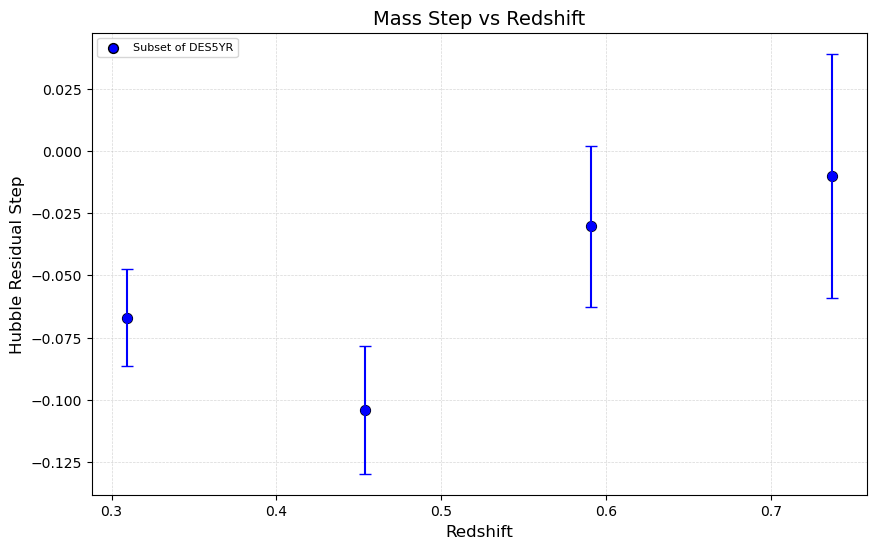

In [88]:
plt.figure(figsize=(10, 6))


# Plotting OzDES data
ozdes_data = [(reg1_z_med, mass_step_z_reg1), (reg2_z_med, mass_step_z_reg2), 
              (reg3_z_med, mass_step_z_reg3), (reg4_z_med, mass_step_z_reg4)]
for z_med, mass_step_z in ozdes_data:
    plt.scatter(z_med, mass_step_z, color='blue', s=50, edgecolor='black', label=r'Subset of DES5YR' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=[mass_step_err_z_reg1, mass_step_err_z_reg2, mass_step_err_z_reg3, mass_step_err_z_reg4][ozdes_data.index((z_med, mass_step_z))], 
                 fmt='o', color='blue', capsize=4)

# Labels and title
plt.xlabel(r'Redshift', fontsize=12)
plt.ylabel(r'Hubble Residual Step', fontsize=12)
plt.title(r'Mass Step vs Redshift', fontsize=14)

# Grid and legend
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8, loc='upper left')

# File saving process
file_pathz1 = 'mass_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)

# Save the plot as a PNG file
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()  # Show the plot

# COLOR

In [12]:
#%%
"""color"""
#find median of each region
#region 1
color_z_reg1= reg1['HOST_COLOR']
med_color_z_reg1= 0.75
#split data into two
color_z_reg1_bm = reg1[color_z_reg1 <= med_color_z_reg1]
color_z_reg1_am = reg1[color_z_reg1 > med_color_z_reg1]
#region 2
color_z_reg2= reg2['HOST_COLOR']
med_color_z_reg2= 0.75
#split data into two
color_z_reg2_bm = reg2[color_z_reg2 <= med_color_z_reg2]
color_z_reg2_am = reg2[color_z_reg2 > med_color_z_reg2]
#region 3
color_z_reg3= reg3['HOST_COLOR']
med_color_z_reg3= 0.75
#split data into two
color_z_reg3_bm = reg3[color_z_reg3 <= med_color_z_reg3]
color_z_reg3_am = reg3[color_z_reg3 > med_color_z_reg3]
#region 4
color_z_reg4= reg4['HOST_COLOR']
med_color_z_reg4= 0.75
#split data into two
color_z_reg4_bm = reg4[color_z_reg4 <= med_color_z_reg4]
color_z_reg4_am = reg4[color_z_reg4 > med_color_z_reg4]
print(color_z_reg4_am)
# %%
#region1
#weighted average for below median 
color_values_bm_z_reg1 = color_z_reg1_bm['delta_mu']
color_weights_bm_z_reg1 = color_z_reg1_bm['MUERR']
color_wa_bm_z_reg1 = weighted_average(color_values_bm_z_reg1, color_weights_bm_z_reg1)
print(f"[color] The weighted average below median for reg1 is: {color_wa_bm_z_reg1}")
#weighted average for above median
color_values_am_z_reg1 = color_z_reg1_am['delta_mu']
color_weights_am_z_reg1 = color_z_reg1_am['MUERR']
color_wa_am_z_reg1 = weighted_average(color_values_am_z_reg1, color_weights_am_z_reg1)
print(f"[color] The weighted average above median for reg1 is: {color_wa_am_z_reg1}")
#region2
#weighted average for below median 
color_values_bm_z_reg2 = color_z_reg2_bm['delta_mu']
color_weights_bm_z_reg2 = color_z_reg2_bm['MUERR']
color_wa_bm_z_reg2 = weighted_average(color_values_bm_z_reg2, color_weights_bm_z_reg2)
print(f"[color] The weighted average below median for reg2 is: {color_wa_bm_z_reg2}")
#weighted average for above median
color_values_am_z_reg2 = color_z_reg2_am['delta_mu']
color_weights_am_z_reg2 = color_z_reg2_am['MUERR']
color_wa_am_z_reg2 = weighted_average(color_values_am_z_reg2, color_weights_am_z_reg2)
print(f"[color] The weighted average above median for reg2 is: {color_wa_am_z_reg2}")
#region3
#weighted average for below median 
color_values_bm_z_reg3 = color_z_reg3_bm['delta_mu']
color_weights_bm_z_reg3 = color_z_reg3_bm['MUERR']
color_wa_bm_z_reg3 = weighted_average(color_values_bm_z_reg3, color_weights_bm_z_reg3)
print(f"[color] The weighted average below median for reg3 is: {color_wa_bm_z_reg3}")
#weighted average for above median
color_values_am_z_reg3 = color_z_reg3_am['delta_mu']
color_weights_am_z_reg3 = color_z_reg3_am['MUERR']
color_wa_am_z_reg3 = weighted_average(color_values_am_z_reg3, color_weights_am_z_reg3)
print(f"[color] The weighted average above median for reg3 is: {color_wa_am_z_reg3}")
#region4
#weighted average for below median 
color_values_bm_z_reg4 = color_z_reg4_bm['delta_mu']
color_weights_bm_z_reg4 = color_z_reg4_bm['MUERR']
color_wa_bm_z_reg4 = weighted_average(color_values_bm_z_reg4, color_weights_bm_z_reg4)
print(f"[color] The weighted average below median for reg4 is: {color_wa_bm_z_reg4}")
#weighted average for above median
color_values_am_z_reg4 = color_z_reg4_am['delta_mu']
color_weights_am_z_reg4 = color_z_reg4_am['MUERR']
color_wa_am_z_reg4 = weighted_average(color_values_am_z_reg4, color_weights_am_z_reg4)
print(f"[color] The weighted average above median for reg4 is: {color_wa_am_z_reg4}")
# %%
print(color_weights_bm_z_reg1)
#%%
#region1
#uncertainty for below median
color_bootstrap_bm_z_reg1 = create_bootstrap_samples_weighted(color_z_reg1_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg1= np.std(color_bootstrap_bm_z_reg1)
intrinsic_error_bm_z_reg1= intrinsic_error(color_z_reg1_bm['MUERR'].values)
#%%
print("[color] uncertainty for below median for reg1 data:", mass_std_bm_z_reg1)
#%%
#uncertainty for above median
color_bootstrap_am_z_reg1= create_bootstrap_samples_weighted(color_z_reg1_am, 'delta_mu', 'MUERR')
color_std_am_z_reg1= np.std(color_bootstrap_am_z_reg1)
intrinsic_error_am_z_reg1= intrinsic_error(color_z_reg1_am['MUERR'].values)
print("[color] uncertainty for above median for reg1 data:", color_std_am_z_reg1)
#region2
#uncertainty for below median
color_bootstrap_bm_z_reg2 = create_bootstrap_samples_weighted(color_z_reg2_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg2= np.std(color_bootstrap_bm_z_reg2)
intrinsic_error_bm_z_reg2= intrinsic_error(color_z_reg2_bm['MUERR'].values)
print("[color] uncertainty for below median for reg2 data:", color_std_bm_z_reg2)
#uncertainty for above median
color_bootstrap_am_z_reg2= create_bootstrap_samples_weighted(color_z_reg2_am, 'delta_mu', 'MUERR')
color_std_am_z_reg2= np.std(color_bootstrap_am_z_reg2)
intrinsic_error_am_z_reg2= intrinsic_error(color_z_reg2_am['MUERR'].values)
print("[color] uncertainty for above median for reg2 data:", color_std_am_z_reg2)
#region3
#uncertainty for below median
color_bootstrap_bm_z_reg3 = create_bootstrap_samples_weighted(color_z_reg3_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg3= np.std(color_bootstrap_bm_z_reg3)
intrinsic_error_bm_z_reg3= intrinsic_error(color_z_reg3_bm['MUERR'].values)
print("color] uncertainty for below median for reg3 data:", color_std_bm_z_reg3)
#uncertainty for above median
color_bootstrap_am_z_reg3= create_bootstrap_samples_weighted(color_z_reg3_am, 'delta_mu', 'MUERR')
color_std_am_z_reg3= np.std(color_bootstrap_am_z_reg3)
intrinsic_error_am_z_reg3= intrinsic_error(color_z_reg3_am['MUERR'].values)
print("[color] uncertainty for above median for reg3 data:", color_std_am_z_reg3)
#region4
#uncertainty for below median
color_bootstrap_bm_z_reg4 = create_bootstrap_samples_weighted(color_z_reg4_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg4= np.std(color_bootstrap_bm_z_reg4)
intrinsic_error_bm_z_reg4= intrinsic_error(color_z_reg4_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg4 data:", color_std_bm_z_reg4)
#uncertainty for above median
color_bootstrap_am_z_reg4= create_bootstrap_samples_weighted(color_z_reg4_am, 'delta_mu', 'MUERR')
color_std_am_z_reg4= np.std(color_bootstrap_am_z_reg4)
intrinsic_error_am_z_reg4= intrinsic_error(color_z_reg4_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg4 data:",color_std_am_z_reg4)
# %%
#calculate the difference of hubble residuals
#region1
color_step_z_reg1= color_wa_am_z_reg1 - color_wa_bm_z_reg1
color_step_err_z_reg1= np.sqrt((color_std_am_z_reg1)**2 + (color_std_bm_z_reg1)**2)
intrin_step_err_z_reg1= np.sqrt((intrinsic_error_am_z_reg1)**2 + (intrinsic_error_bm_z_reg1)**2)
print("[MASS] hubble residual diff for reg1:", mass_step_z_reg1, "with redshift=", reg1_z_med )
print("[MASS] the error of hubble residual diff for reg1:", mass_step_err_z_reg1)
print("[MASS] the intrinsic error of hubble residual diff for reg1:", intrin_step_err_z_reg1)
#region2
color_step_z_reg2= color_wa_am_z_reg2 - color_wa_bm_z_reg2
color_step_err_z_reg2= np.sqrt((color_std_am_z_reg2)**2 + (color_std_bm_z_reg2)**2)
intrin_step_err_z_reg2= np.sqrt((intrinsic_error_am_z_reg2)**2 + (intrinsic_error_bm_z_reg2)**2)
print("[MASS] hubble residual diff for reg2:", color_step_z_reg2, "with redshift=", reg2_z_med )
print("[MASS] the error of hubble residual diff for reg2", color_step_err_z_reg2)
print("[MASS] the intrinsic error of hubble residual diff for reg2:", intrin_step_err_z_reg2)
#region3
color_step_z_reg3= color_wa_am_z_reg3 - color_wa_bm_z_reg3
color_step_err_z_reg3= np.sqrt((color_std_am_z_reg3)**2 + (color_std_bm_z_reg3)**2)
intrin_step_err_z_reg3= np.sqrt((intrinsic_error_am_z_reg3)**2 + (intrinsic_error_bm_z_reg3)**2)
print("[MASS] hubble residual diff for reg3:", mass_step_z_reg3, "with redshift=", reg3_z_med )
print("[MASS] the error of hubble residual diff for reg3:", mass_step_err_z_reg3)
print("[MASS] the intrinsic error of hubble residual diff for reg3:", intrin_step_err_z_reg3)
#region4
color_step_z_reg4= color_wa_am_z_reg4 - color_wa_bm_z_reg4
color_step_err_z_reg4= np.sqrt((color_std_am_z_reg4)**2 + (color_std_bm_z_reg4)**2)
intrin_step_err_z_reg4= np.sqrt((intrinsic_error_am_z_reg4)**2 + (intrinsic_error_bm_z_reg4)**2)
print("[MASS] hubble residual diff for reg4:", color_step_z_reg4, "with redshift=", reg4_z_med )
print("[MASS] the error of hubble residual diff for reg4", color_step_err_z_reg4)
print("[MASS] the intrinsic error of hubble residual diff for reg4:", intrin_step_err_z_reg4)

    VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
5         SN:  1833468  1833468        10     0    X3              3   
6         SN:  1338718  1338718        10     0    S1              3   
11        SN:  1339246  1339246        10     0    C3              3   
28        SN:  1264038  1264038        10     0    C3              3   
32        SN:  1552143  1552143        10     0    C1              3   
..        ...      ...      ...       ...   ...   ...            ...   
670       SN:  1433114  1433114        10     0    C3              3   
681       SN:  1642178  1642178        10     0    C3              3   
686       SN:  1300777  1300777        10     0    X3              3   
688       SN:  1330995  1330995        10     0    X2              3   
693       SN:  1265231  1265231        10     0    X3              3   

     ERRFLAG_FIT     zHEL  zHELERR     zCMB  zCMBERR      zHD   zHDERR  VPEC  \
5              0  0.78516    0.001  0.78375    0.001  0

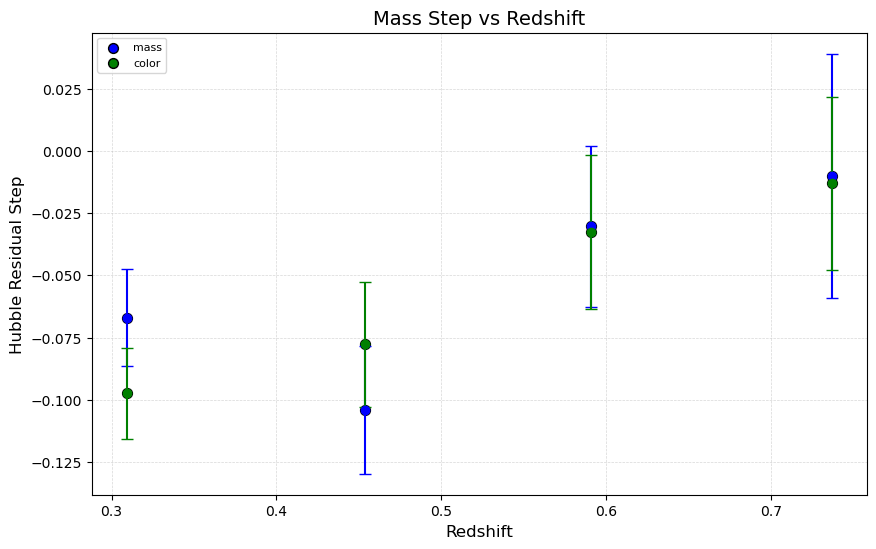

In [90]:
plt.figure(figsize=(10, 6))


# Plotting OzDES data
mass_data = [(reg1_z_med, mass_step_z_reg1), (reg2_z_med, mass_step_z_reg2), 
              (reg3_z_med, mass_step_z_reg3), (reg4_z_med, mass_step_z_reg4)]
for z_med, mass_step_z in mass_data:
    plt.scatter(z_med, mass_step_z, color='blue', s=50, edgecolor='black', label=r'mass' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=[mass_step_err_z_reg1, mass_step_err_z_reg2, mass_step_err_z_reg3, mass_step_err_z_reg4][ozdes_data.index((z_med, mass_step_z))], 
                 fmt='o', color='blue', capsize=4)
    
# Plotting OzDES data
color_data = [
    (reg1_z_med, color_step_z_reg1, color_step_err_z_reg1),
    (reg2_z_med, color_step_z_reg2, color_step_err_z_reg2),
    (reg3_z_med, color_step_z_reg3, color_step_err_z_reg3),
    (reg4_z_med, color_step_z_reg4, color_step_err_z_reg4),
]

for z_med, mass_step_z, err in color_data:
    plt.scatter(z_med, mass_step_z, color='green', s=50, edgecolor='black', label=r'color' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=err, fmt='o', color='green', capsize=4)


# Labels and title
plt.xlabel(r'Redshift', fontsize=12)
plt.ylabel(r'Hubble Residual Step', fontsize=12)
plt.title(r'Mass Step vs Redshift', fontsize=14)

# Grid and legend
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8, loc='upper left')

# File saving process
file_pathz1 = 'mass_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)

# Save the plot as a PNG file
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()  # Show the plot

# OII

In [13]:
#%%
"""OII"""
oII= df_merged['LOG_OII']
med_oII= 1.25
#find median of each region
#region 1
oII_z_reg1= reg1['LOG_OII']
med_oII_z_reg1= med_oII
#split data into two
oII_z_reg1_bm = reg1[oII_z_reg1 <= med_oII_z_reg1]
oII_z_reg1_am = reg1[oII_z_reg1 > med_oII_z_reg1]
#region 2
oII_z_reg2= reg2['LOG_OII']
med_oII_z_reg2= med_oII
#split data into two
oII_z_reg2_bm = reg2[oII_z_reg2 <= med_oII_z_reg2]
oII_z_reg2_am = reg2[oII_z_reg2 > med_oII_z_reg2]
#region 3
oII_z_reg3= reg3['LOG_OII']
med_oII_z_reg3= med_oII
#split data into two
oII_z_reg3_bm = reg3[oII_z_reg3 <= med_oII_z_reg3]
oII_z_reg3_am = reg3[oII_z_reg3 > med_oII_z_reg3]
#region 4
oII_z_reg4= reg4['LOG_OII']
med_oII_z_reg4= med_oII
#split data into two
oII_z_reg4_bm = reg4[oII_z_reg4 <= med_oII_z_reg4]
oII_z_reg4_am = reg4[oII_z_reg4 > med_oII_z_reg4]
# %%
#region1
#weighted average for below median 
oII_values_bm_z_reg1 = oII_z_reg1_bm['delta_mu']
oII_weights_bm_z_reg1 = oII_z_reg1_bm['MUERR']
oII_wa_bm_z_reg1 = weighted_average(oII_values_bm_z_reg1, oII_weights_bm_z_reg1)
print(f"[MASS] The weighted average below median for reg1 is: {oII_wa_bm_z_reg1}")
#weighted average for above median
oII_values_am_z_reg1 = oII_z_reg1_am['delta_mu']
oII_weights_am_z_reg1 = oII_z_reg1_am['MUERR']
oII_wa_am_z_reg1 = weighted_average(oII_values_am_z_reg1, oII_weights_am_z_reg1)
print(f"[MASS] The weighted average above median for reg1 is: {oII_wa_am_z_reg1}")
#region2
#weighted average for below median 
oII_values_bm_z_reg2 = oII_z_reg2_bm['delta_mu']
oII_weights_bm_z_reg2 = oII_z_reg2_bm['MUERR']
oII_wa_bm_z_reg2 = weighted_average(oII_values_bm_z_reg2, oII_weights_bm_z_reg2)
print(f"[MASS] The weighted average below median for reg2 is: {oII_wa_bm_z_reg2}")
#weighted average for above median
oII_values_am_z_reg2 = oII_z_reg2_am['delta_mu']
oII_weights_am_z_reg2 = oII_z_reg2_am['MUERR']
oII_wa_am_z_reg2 = weighted_average(oII_values_am_z_reg2, oII_weights_am_z_reg2)
print(f"[MASS] The weighted average above median for reg2 is: {oII_wa_am_z_reg2}")
#region3
#weighted average for below median 
oII_values_bm_z_reg3 = oII_z_reg3_bm['delta_mu']
oII_weights_bm_z_reg3 = oII_z_reg3_bm['MUERR']
oII_wa_bm_z_reg3 = weighted_average(oII_values_bm_z_reg3, oII_weights_bm_z_reg3)
print(f"[MASS] The weighted average below median for reg3 is: {oII_wa_bm_z_reg3}")
#weighted average for above median
oII_values_am_z_reg3 = oII_z_reg3_am['delta_mu']
oII_weights_am_z_reg3 = oII_z_reg3_am['MUERR']
oII_wa_am_z_reg3 = weighted_average(oII_values_am_z_reg3, oII_weights_am_z_reg3)
print(f"[MASS] The weighted average above median for reg3 is: {oII_wa_am_z_reg3}")
#region4
#weighted average for below median 
oII_values_bm_z_reg4 = oII_z_reg4_bm['delta_mu']
oII_weights_bm_z_reg4 = oII_z_reg4_bm['MUERR']
oII_wa_bm_z_reg4 = weighted_average(oII_values_bm_z_reg4, oII_weights_bm_z_reg4)
print(f"[MASS] The weighted average below median for reg4 is: {oII_wa_bm_z_reg4}")
#weighted average for above median
oII_values_am_z_reg4 = oII_z_reg4_am['delta_mu']
oII_weights_am_z_reg4 = oII_z_reg4_am['MUERR']
oII_wa_am_z_reg4 = weighted_average(oII_values_am_z_reg4, oII_weights_am_z_reg4)
print(f"[MASS] The weighted average above median for reg4 is: {oII_wa_am_z_reg4}")
# %%
print(oII_weights_bm_z_reg1)
#%%
#region1
#uncertainty for below median
oII_bootstrap_bm_z_reg1 = create_bootstrap_samples_weighted(oII_z_reg1_bm, 'delta_mu', 'MUERR')
oII_std_bm_z_reg1= np.std(oII_bootstrap_bm_z_reg1)
intrinsic_error_bm_z_reg1= intrinsic_error(oII_z_reg1_bm['MUERR'].values)
#%%
print("[MASS] uncertainty for below median for reg1 data:", oII_std_bm_z_reg1)
#%%
#uncertainty for above median
oII_bootstrap_am_z_reg1= create_bootstrap_samples_weighted(oII_z_reg1_am, 'delta_mu', 'MUERR')
oII_std_am_z_reg1= np.std(oII_bootstrap_am_z_reg1)
intrinsic_error_am_z_reg1= intrinsic_error(oII_z_reg1_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg1 data:", oII_std_am_z_reg1)
#region2
#uncertainty for below median
oII_bootstrap_bm_z_reg2 = create_bootstrap_samples_weighted(oII_z_reg2_bm, 'delta_mu', 'MUERR')
oII_std_bm_z_reg2= np.std(oII_bootstrap_bm_z_reg2)
intrinsic_error_bm_z_reg2= intrinsic_error(oII_z_reg2_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg2 data:", oII_std_bm_z_reg2)
#uncertainty for above median
oII_bootstrap_am_z_reg2= create_bootstrap_samples_weighted(oII_z_reg2_am, 'delta_mu', 'MUERR')
oII_std_am_z_reg2= np.std(oII_bootstrap_am_z_reg2)
intrinsic_error_am_z_reg2= intrinsic_error(oII_z_reg2_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg2 data:", oII_std_am_z_reg2)
#region3
#uncertainty for below median
oII_bootstrap_bm_z_reg3 = create_bootstrap_samples_weighted(oII_z_reg3_bm, 'delta_mu', 'MUERR')
oII_std_bm_z_reg3= np.std(oII_bootstrap_bm_z_reg3)
intrinsic_error_bm_z_reg3= intrinsic_error(oII_z_reg3_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg3 data:", oII_std_bm_z_reg3)
#uncertainty for above median
oII_bootstrap_am_z_reg3= create_bootstrap_samples_weighted(oII_z_reg3_am, 'delta_mu', 'MUERR')
oII_std_am_z_reg3= np.std(oII_bootstrap_am_z_reg3)
intrinsic_error_am_z_reg3= intrinsic_error(oII_z_reg3_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg3 data:", oII_std_am_z_reg3)
#region4
#uncertainty for below median
oII_bootstrap_bm_z_reg4 = create_bootstrap_samples_weighted(oII_z_reg4_bm, 'delta_mu', 'MUERR')
oII_std_bm_z_reg4= np.std(oII_bootstrap_bm_z_reg4)
intrinsic_error_bm_z_reg4= intrinsic_error(oII_z_reg4_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg4 data:", oII_std_bm_z_reg4)
#uncertainty for above median
oII_bootstrap_am_z_reg4= create_bootstrap_samples_weighted(oII_z_reg4_am, 'delta_mu', 'MUERR')
oII_std_am_z_reg4= np.std(oII_bootstrap_am_z_reg4)
intrinsic_error_am_z_reg4= intrinsic_error(oII_z_reg4_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg4 data:", oII_std_am_z_reg4)
# %%
#calculate the difference of hubble residuals
#region1
oII_step_z_reg1= oII_wa_bm_z_reg1 - oII_wa_am_z_reg1
oII_step_err_z_reg1= np.sqrt((oII_std_am_z_reg1)**2 + (oII_std_bm_z_reg1)**2)
intrin_step_err_z_reg1= np.sqrt((intrinsic_error_am_z_reg1)**2 + (intrinsic_error_bm_z_reg1)**2)
print("[MASS] hubble residual diff for reg1:", oII_step_z_reg1, "with redshift=", reg1_z_med )
print("[MASS] the error of hubble residual diff for reg1:", oII_step_err_z_reg1)
print("[MASS] the intrinsic error of hubble residual diff for reg1:", intrin_step_err_z_reg1)
#region2
oII_step_z_reg2= oII_wa_bm_z_reg2 - oII_wa_am_z_reg2
oII_step_err_z_reg2= np.sqrt((oII_std_am_z_reg2)**2 + (oII_std_bm_z_reg2)**2)
intrin_step_err_z_reg2= np.sqrt((intrinsic_error_am_z_reg2)**2 + (intrinsic_error_bm_z_reg2)**2)
print("[MASS] hubble residual diff for reg2:", oII_step_z_reg2, "with redshift=", reg2_z_med )
print("[MASS] the error of hubble residual diff for reg2", oII_step_err_z_reg2)
print("[MASS] the intrinsic error of hubble residual diff for reg2:", intrin_step_err_z_reg2)
#region3
oII_step_z_reg3= oII_wa_bm_z_reg3 - oII_wa_am_z_reg3
oII_step_err_z_reg3= np.sqrt((oII_std_am_z_reg3)**2 + (oII_std_bm_z_reg3)**2)
intrin_step_err_z_reg3= np.sqrt((intrinsic_error_am_z_reg3)**2 + (intrinsic_error_bm_z_reg3)**2)
print("[MASS] hubble residual diff for reg3:", oII_step_z_reg3, "with redshift=", reg3_z_med )
print("[MASS] the error of hubble residual diff for reg3:", oII_step_err_z_reg3)
print("[MASS] the intrinsic error of hubble residual diff for reg3:", intrin_step_err_z_reg3)
#region4
oII_step_z_reg4= oII_wa_bm_z_reg4 - oII_wa_am_z_reg4
oII_step_err_z_reg4= np.sqrt((oII_std_am_z_reg4)**2 + (oII_std_bm_z_reg4)**2)
intrin_step_err_z_reg4= np.sqrt((intrinsic_error_am_z_reg4)**2 + (intrinsic_error_bm_z_reg4)**2)
print("[MASS] hubble residual diff for reg4:", oII_step_z_reg4, "with redshift=", reg4_z_med )
print("[MASS] the error of hubble residual diff for reg4:", oII_step_err_z_reg4)
print("[MASS] the intrinsic error of hubble residual diff for reg4:", intrin_step_err_z_reg4)

[MASS] The weighted average below median for reg1 is: -0.03946942099905275
[MASS] The weighted average above median for reg1 is: 0.0530948876930773
[MASS] The weighted average below median for reg2 is: -0.049261169558062624
[MASS] The weighted average above median for reg2 is: 0.035093889607673484
[MASS] The weighted average below median for reg3 is: -0.028726474940181348
[MASS] The weighted average above median for reg3 is: 0.016785296673865614
[MASS] The weighted average below median for reg4 is: -0.014547213837437864
[MASS] The weighted average above median for reg4 is: 0.024005180936526368
9      0.16339
30     0.12008
42     0.13362
54     0.13504
58     0.14481
        ...   
638    0.13790
667    0.12366
668    0.13294
671    0.12934
685    0.12507
Name: MUERR, Length: 89, dtype: float64
[MASS] uncertainty for below median for reg1 data: 0.012169384556671776
[MASS] uncertainty for above median for reg1 data: 0.013371386277710206
[MASS] uncertainty for below median for reg2 data:

NameError: name 'ozdes_data' is not defined

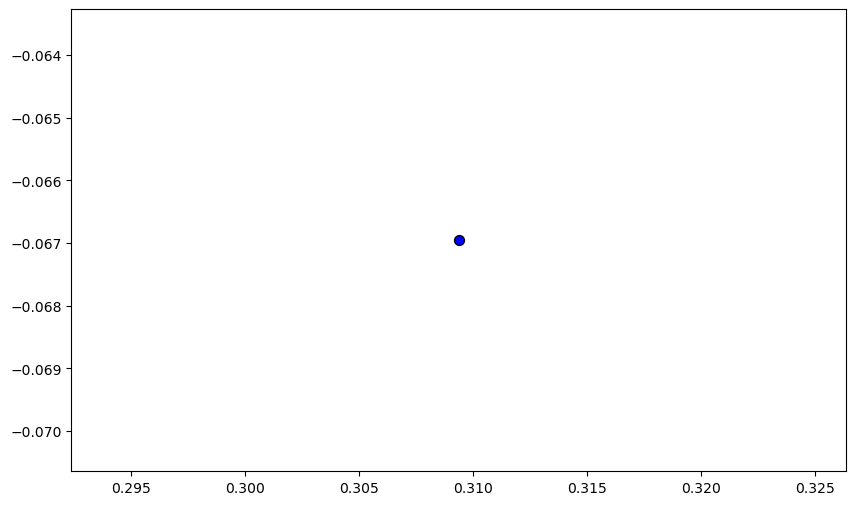

In [14]:
plt.figure(figsize=(10, 6))


# Plotting OzDES data
mass_data = [(reg1_z_med, mass_step_z_reg1), (reg2_z_med, mass_step_z_reg2), 
              (reg3_z_med, mass_step_z_reg3), (reg4_z_med, mass_step_z_reg4)]
for z_med, mass_step_z in mass_data:
    plt.scatter(z_med, mass_step_z, color='blue', s=50, edgecolor='black', label=r'mass' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=[mass_step_err_z_reg1, mass_step_err_z_reg2, mass_step_err_z_reg3, mass_step_err_z_reg4][ozdes_data.index((z_med, mass_step_z))], 
                 fmt='o', color='blue', capsize=4)
    
# Plotting OzDES data
color_data = [
    (reg1_z_med, color_step_z_reg1, color_step_err_z_reg1),
    (reg2_z_med, color_step_z_reg2, color_step_err_z_reg2),
    (reg3_z_med, color_step_z_reg3, color_step_err_z_reg3),
    (reg4_z_med, color_step_z_reg4, color_step_err_z_reg4),
]

for z_med, mass_step_z, err in color_data:
    plt.scatter(z_med, mass_step_z, color='green', s=50, edgecolor='black', label=r'color' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=err, fmt='o', color='lightgrey', capsize=4)

# Plotting OzDES data
oII_data = [
    (reg1_z_med, oII_step_z_reg1, oII_step_err_z_reg1),
    (reg2_z_med, oII_step_z_reg2, oII_step_err_z_reg2),
    (reg3_z_med, oII_step_z_reg3, oII_step_err_z_reg3),
    (reg4_z_med, oII_step_z_reg4, oII_step_err_z_reg4),
]

for z_med, oII_step_z, err in oII_data:
    plt.scatter(z_med, oII_step_z, color='orange', s=50, edgecolor='black', label=r'OII' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, oII_step_z, yerr=err, fmt='o', color='orange', capsize=4)

# Labels and title
plt.xlabel(r'Redshift', fontsize=12)
plt.ylabel(r'Hubble Residual Step', fontsize=12)
plt.title(r'Mass Step vs Redshift', fontsize=14)

# Grid and legend
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8, loc='upper left')

# File saving process
file_pathz1 = 'mass_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)

# Save the plot as a PNG file
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()  # Show the plot

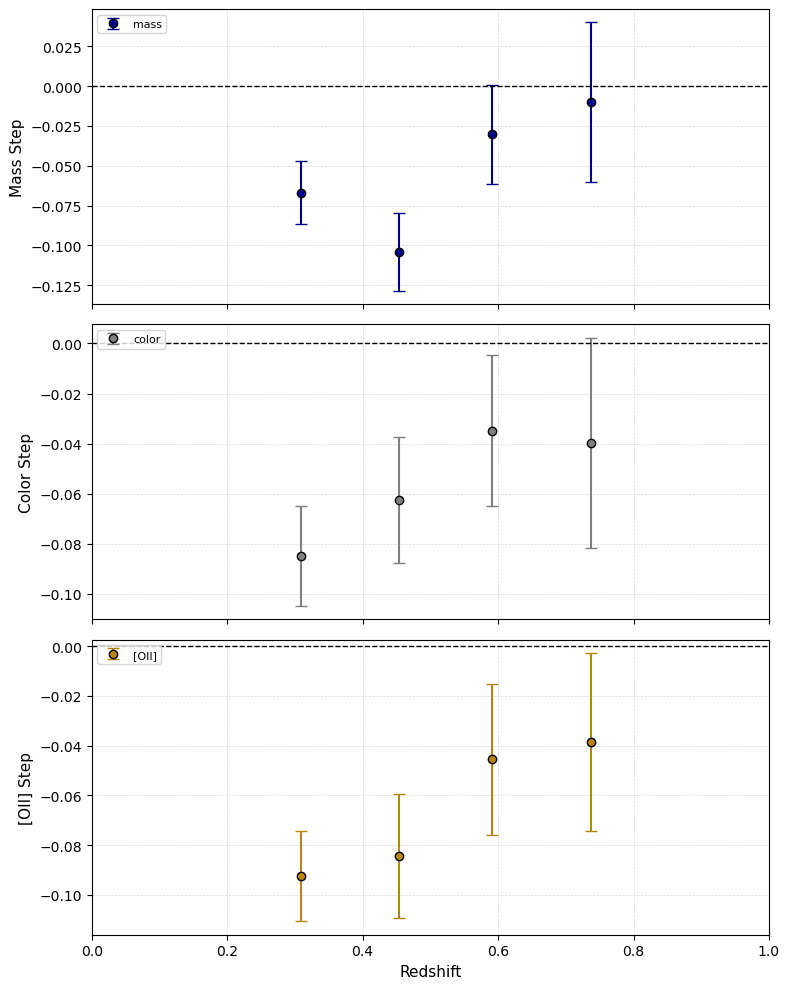

In [15]:
import matplotlib.pyplot as plt
import os

# Create 3 vertically stacked subplots with shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(8,10), sharex=True)

# Set common x-limits
x_min, x_max = 0, 1.0

# Plot 1: Mass Step
mass_data = [
    (reg1_z_med, mass_step_z_reg1, mass_step_err_z_reg1),
    (reg2_z_med, mass_step_z_reg2, mass_step_err_z_reg2),
    (reg3_z_med, mass_step_z_reg3, mass_step_err_z_reg3),
    (reg4_z_med, mass_step_z_reg4, mass_step_err_z_reg4),
]
for z, step, err in mass_data:
    axs[0].errorbar(z, step, yerr=err, fmt='o', color='darkblue', 
                    markersize=6, markeredgecolor='black', capsize=4, label='mass' if z == reg1_z_med else "")
axs[0].axhline(0, color='black', linestyle='--', linewidth=1)
axs[0].set_ylabel(r'Mass Step', fontsize=11)
axs[0].grid(alpha=0.5, linestyle='--', linewidth=0.5)
axs[0].legend(fontsize=8, loc='upper left')
axs[0].set_xlim(x_min, x_max)

# Plot 2: Color Step
color_data = [
    (reg1_z_med, color_step_z_reg1, color_step_err_z_reg1),
    (reg2_z_med, color_step_z_reg2, color_step_err_z_reg2),
    (reg3_z_med, color_step_z_reg3, color_step_err_z_reg3),
    (reg4_z_med, color_step_z_reg4, color_step_err_z_reg4),
]
for z, step, err in color_data:
    axs[1].errorbar(z, step, yerr=err, fmt='o', color='grey', 
                    markersize=6, markeredgecolor='black', capsize=4, label='color' if z == reg1_z_med else "")
axs[1].axhline(0, color='black', linestyle='--', linewidth=1)
axs[1].set_ylabel(r'Color Step', fontsize=11)
axs[1].grid(alpha=0.5, linestyle='--', linewidth=0.5)
axs[1].legend(fontsize=8, loc='upper left')
axs[1].set_xlim(x_min, x_max)

# Plot 3: [OII] Step
oII_data = [
    (reg1_z_med, oII_step_z_reg1, oII_step_err_z_reg1),
    (reg2_z_med, oII_step_z_reg2, oII_step_err_z_reg2),
    (reg3_z_med, oII_step_z_reg3, oII_step_err_z_reg3),
    (reg4_z_med, oII_step_z_reg4, oII_step_err_z_reg4),
]
for z, step, err in oII_data:
    axs[2].errorbar(z, step, yerr=err, fmt='o', color='darkgoldenrod', 
                    markersize=6, markeredgecolor='black', capsize=4, label=r'[OII]' if z == reg1_z_med else "")
axs[2].axhline(0, color='black', linestyle='--', linewidth=1)
axs[2].set_ylabel(r'[OII] Step', fontsize=11)
axs[2].set_xlabel(r'Redshift', fontsize=11)
axs[2].grid(alpha=0.5, linestyle='--', linewidth=0.5)
axs[2].legend(fontsize=8, loc='upper left')
axs[2].set_xlim(x_min, x_max)

# Adjust layout
plt.tight_layout()

# Save the plot
file_pathz1 = 'mass_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()


# SIM

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_fitres(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Find VARNAMES line
    column_names = None
    for line in lines:
        if line.startswith('VARNAMES:'):
            column_names = line.replace('VARNAMES:', '').strip().split()
            break
    if column_names is None:
        raise ValueError(f"VARNAMES line not found in {file_path}")

    # Make column names unique
    counts = Counter()
    unique_column_names = []
    for name in column_names:
        if counts[name]:
            unique_column_names.append(f"{name}_{counts[name]}")
        else:
            unique_column_names.append(name)
        counts[name] += 1

    # Find data start index
    data_start_index = None
    for i, line in enumerate(lines):
        if line.startswith('SN:'):
            data_start_index = i
            break
    if data_start_index is None:
        raise ValueError(f"Data (SN:) section not found in {file_path}")

    df = pd.read_csv(
        file_path,
        delim_whitespace=True,
        skiprows=data_start_index,
        names=unique_column_names,
        comment='#'
    )
    return df

# File paths
input_file = '/priv/debass/DES/SIMS/sims/SNe/for_BBC/BS20/FITOPT000.FITRES'
output_file = '/priv/debass/DES/SIMS/sims/SNe/for_BBC/BS20/FITOPT000.FITRES'

# Load data
df_input = load_fitres(input_file)
df_output = load_fitres(output_file)
# Downsample df_output to 695 rows if it has more
#if len(df_output) > 695:
    #df_output = df_output.sample(n=695, random_state=42)
#else:
    #df_output = df_output
# Extract columns
distmod = df_input['distmod'].dropna()
mass= df_output['HOST_LOGMASS'].dropna()
MU = df_output['MU'].dropna()
redshift= df_input['zHD'].dropna()
residual= distmod - MU
MURES=  df_output['MURES']
M0DIF= df_output['M0DIF']
MUMODEL= df_output['MUMODEL']
MU_ADD= MUMODEL + MURES
print(residual)
# Use common bin edges for comparison
all_data = np.concatenate([distmod, MU])
bins = np.linspace(all_data.min(), all_data.max(), 30)

plt.figure(figsize=(10, 6))
plt.hist(distmod, bins=bins, alpha=0.6, label='distance modulus before BBC', color='#7bb7f6', edgecolor='black')
plt.hist(MU, bins=bins, alpha=0.6, label='distance modulus after BBC', color="#A68B41", edgecolor='black')
plt.xlabel('Distance Modulus', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('BBC Correction', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(df_input.columns)

/tmp/ipykernel_1256396/3455534447.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipykernel_1256396/3455534447.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


KeyError: 'MU'

In [95]:
#find median of [HOST_MASS]
sim_mass= df_output['HOST_LOGMASS']
#med_mass= np.median(mass)
med_mass=10

#split data into two
sim_mass_below_median = df_output[sim_mass <= med_mass]
sim_mass_above_median = df_output[sim_mass > med_mass]

#weighted average for below median 
sim_mass_values_bm = sim_mass_below_median['MURES']
sim_mass_weights_bm = sim_mass_below_median['MUERR']
sim_mass_wa_bm = weighted_average(sim_mass_values_bm, sim_mass_weights_bm)
print(f"(MASS) The weighted average below median is: {sim_mass_wa_bm}")
#weighted average for above median
sim_mass_values_am = sim_mass_above_median['MURES']
sim_mass_weights_am = sim_mass_above_median['MUERR']
sim_mass_wa_am = weighted_average(sim_mass_values_am, sim_mass_weights_am)
print(f"(MASS) The weighted average above median is: {sim_mass_wa_am}")

#uncertainty for below median
sim_mass_bootstrap_bm = create_bootstrap_samples_weighted(sim_mass_below_median, 'MURES', 'MUERR')
sim_mass_std_bm= np.std(sim_mass_bootstrap_bm)
print("(MASS) uncertainty for below median data:", sim_mass_std_bm)
#uncertainty for above median
sim_mass_bootstrap_am = create_bootstrap_samples_weighted(sim_mass_above_median, 'MURES', 'MUERR')
sim_mass_std_am= np.std(sim_mass_bootstrap_am)
print("(MASS) uncertainty for above median data:", sim_mass_std_am)

#find corresponding x axis (median)
sim_massx_bm=sim_mass_below_median['HOST_LOGMASS']
sim_mass_x_bm= np.median(sim_massx_bm)
sim_massx_am=sim_mass_above_median['HOST_LOGMASS']
sim_mass_x_am= np.median(sim_massx_am)

#extract axis for plot
#y axis for plot
sim_dmu=df_output['MURES']
#x axis for plot
mass_x_bm = sim_mass_x_bm
mass_x_am = sim_mass_x_am

#calculate the difference of hubble residuals
sim_mass_step= abs(sim_mass_wa_am - sim_mass_wa_bm)
sim_mass_step_err= np.sqrt((sim_mass_std_am)**2 + (sim_mass_std_bm)**2)
print("(MASS) hubble residual diff:", sim_mass_step)
print("(MASS) the error of hubble residual diff:", sim_mass_step_err)
print(med_mass)


(MASS) The weighted average below median is: 0.002457372564317238
(MASS) The weighted average above median is: -0.000490368331980745
(MASS) uncertainty for below median data: 0.018207071942601776
(MASS) uncertainty for above median data: 0.007405539115679575
(MASS) hubble residual diff: 0.0029477408962979832
(MASS) the error of hubble residual diff: 0.019655520301353945
10


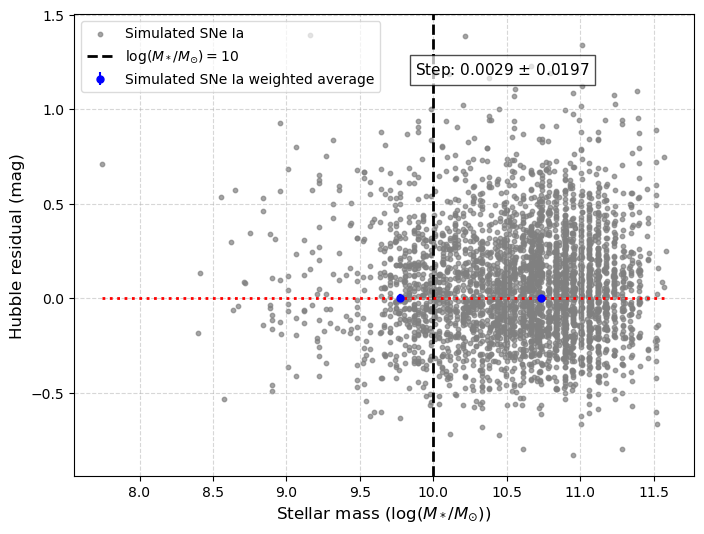

In [96]:
plt.figure(figsize=(8, 6))

# Scatter plot for the data points
plt.scatter(sim_mass, sim_dmu, s=10, color='gray', alpha=0.7, label='Simulated SNe Ia')

# Labels and titles
plt.xlabel(r'Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=12)
plt.ylabel(r'Hubble residual (mag)', fontsize=12)
#plt.title(r'Hubble residuals vs Mass', fontsize=14)

# Add the vertical and horizontal lines
plt.axvline(x=med_mass, color='black', linestyle='--', lw=2, label='$\log(M_*/M_{\odot}) = 10$')
plt.hlines(sim_mass_wa_bm, xmin=sim_mass.min(), xmax=med_mass, color='red', linestyle=':', lw=2)  # Left side
plt.hlines(sim_mass_wa_am, xmin=med_mass, xmax=sim_mass.max(), color='red', linestyle=':', lw=2)  # Right side

# Add error bars for weighted averages
plt.errorbar(mass_x_bm, sim_mass_wa_bm, yerr=sim_mass_std_bm, fmt='o', color='blue', markersize=5, label='Simulated SNe Ia weighted average')
plt.errorbar(mass_x_am, sim_mass_wa_am, yerr=sim_mass_std_am, fmt='o', color='blue', markersize=5)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusted legend style: Only one entry for weighted average w/ error
plt.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)

# Add custom text annotation for the step
plt.text(0.55, 0.9, rf'Step: {sim_mass_step:.4f} $\pm$ {sim_mass_step_err:.4f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))


# Display the plot
plt.show()

In [97]:
#find median of [HOST_MASS]
sim_color= df_output['U-R']
#med_mass= np.median(mass)
med_color= 1.3

#split data into two
sim_color_below_median = df_output[sim_color <= med_color]
sim_color_above_median = df_output[sim_color > med_color]

#weighted average for below median 
sim_color_values_bm = sim_color_below_median['MURES']
sim_color_weights_bm = sim_color_below_median['MUERR']
sim_color_wa_bm = weighted_average(sim_color_values_bm, sim_color_weights_bm)
print(f"(MASS) The weighted average below median is: {sim_color_wa_bm}")
#weighted average for above median
sim_color_values_am = sim_color_above_median['MURES']
sim_color_weights_am = sim_color_above_median['MUERR']
sim_color_wa_am = weighted_average(sim_color_values_am, sim_color_weights_am)
print(f"(MASS) The weighted average above median is: {sim_color_wa_am}")

#uncertainty for below median
sim_color_bootstrap_bm = create_bootstrap_samples_weighted(sim_color_below_median, 'MURES', 'MUERR')
sim_color_std_bm= np.std(sim_color_bootstrap_bm)
print("(MASS) uncertainty for below median data:", sim_color_std_bm)
#uncertainty for above median
sim_color_bootstrap_am = create_bootstrap_samples_weighted(sim_color_above_median, 'MURES', 'MUERR')
sim_color_std_am= np.std(sim_color_bootstrap_am)
print("(MASS) uncertainty for above median data:", sim_color_std_am)

#find corresponding x axis (median)
sim_colorx_bm=sim_color_below_median['U-R']
sim_color_x_bm= np.median(sim_colorx_bm)
sim_colorx_am=sim_color_above_median['U-R']
sim_color_x_am= np.median(sim_colorx_am)

#extract axis for plot
#y axis for plot
sim_dmu=df_output['MURES']
#x axis for plot
color_x_bm = sim_color_x_bm
color_x_am = sim_color_x_am

#calculate the difference of hubble residuals
sim_color_step= abs(sim_color_wa_am - sim_color_wa_bm)
sim_color_step_err= np.sqrt((sim_color_std_am)**2 + (sim_color_std_bm)**2)
print("(COLOR) hubble residual diff:", sim_color_step)
print("(COLOR) the error of hubble residual diff:", sim_color_step_err)
print(med_color)


(MASS) The weighted average below median is: 0.001273703699869898
(MASS) The weighted average above median is: -0.0021217680983073744
(MASS) uncertainty for below median data: 0.008281593138670947
(MASS) uncertainty for above median data: 0.012114453525465883
(COLOR) hubble residual diff: 0.0033954717981772723
(COLOR) the error of hubble residual diff: 0.014674630119193958
1.3


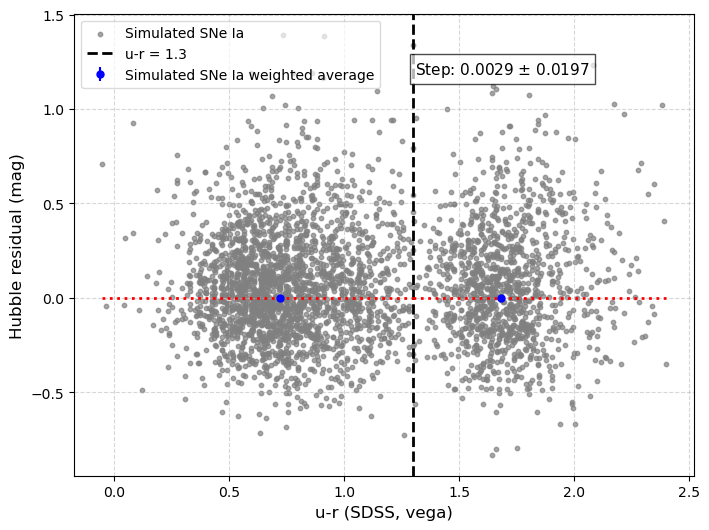

In [98]:
plt.figure(figsize=(8, 6))

# Scatter plot for the data points
plt.scatter(sim_color, sim_dmu, s=10, color='gray', alpha=0.7, label='Simulated SNe Ia')

# Labels and titles
plt.xlabel(r'u-r (SDSS, vega)', fontsize=12)
plt.ylabel(r'Hubble residual (mag)', fontsize=12)
#plt.title(r'Hubble residuals vs Mass', fontsize=14)

# Add the vertical and horizontal lines
plt.axvline(x=med_color, color='black', linestyle='--', lw=2, label='u-r = 1.3')
plt.hlines(sim_color_wa_bm, xmin=sim_color.min(), xmax=med_color, color='red', linestyle=':', lw=2)  # Left side
plt.hlines(sim_color_wa_am, xmin=med_color, xmax=sim_color.max(), color='red', linestyle=':', lw=2)  # Right side

# Add error bars for weighted averages
plt.errorbar(color_x_bm, sim_color_wa_bm, yerr=sim_color_std_bm, fmt='o', color='blue', markersize=5, label='Simulated SNe Ia weighted average')
plt.errorbar(color_x_am, sim_color_wa_am, yerr=sim_color_std_am, fmt='o', color='blue', markersize=5)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusted legend style: Only one entry for weighted average w/ error
plt.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)

# Add custom text annotation for the step
plt.text(0.55, 0.9, rf'Step: {sim_mass_step:.4f} $\pm$ {sim_mass_step_err:.4f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))


# Display the plot
plt.show()

In [99]:
#splitting data based on redshift value
sim_z= df_output['zHD']
sim_q1_z=np.percentile(sim_z, 25)
#q1_z_med=np.median(q1_z)
sim_med_z= np.percentile(sim_z,50)
sim_q3_z=np.percentile(sim_z,75)
#%%
sim_reg1= df_output[sim_z < sim_q1_z]
sim_reg1_z_med = np.median(sim_reg1['zHD'])
sim_reg2 = df_output[(sim_z >= sim_q1_z) & (sim_z < sim_med_z)]
sim_reg2_z_med = np.median(sim_reg2['zHD'])
sim_reg3 = df_output[(sim_z >= sim_med_z) & (sim_z < sim_q3_z)]
sim_reg3_z_med = np.median(sim_reg3['zHD'])
sim_reg4 = df_output[sim_z >= q3_z]
sim_reg4_z_med = np.median(sim_reg4['zHD'])
print(sim_reg1['zHD'])
print(sim_reg2['zHD'])
print(sim_reg3['zHD'])
print(sim_reg4['zHD'])

#%%
"""Mass"""
#find median of each region
#region 1
sim_mass_z_reg1= sim_reg1['HOST_LOGMASS']
sim_med_mass_z_reg1= med_mass
#split data into two
sim_mass_z_reg1_bm = sim_reg1[sim_mass_z_reg1 <= med_mass]
sim_mass_z_reg1_am = sim_reg1[sim_mass_z_reg1 > med_mass]
#region 2
sim_mass_z_reg2= sim_reg2['HOST_LOGMASS']
sim_med_mass_z_reg2= med_mass
#split data into two
sim_mass_z_reg2_bm = sim_reg2[sim_mass_z_reg2 <= med_mass]
sim_mass_z_reg2_am = sim_reg2[sim_mass_z_reg2 > med_mass]
#region 3
sim_mass_z_reg3= sim_reg3['HOST_LOGMASS']
sim_med_mass_z_reg3= med_mass
#split data into two
sim_mass_z_reg3_bm = sim_reg3[sim_mass_z_reg3 <= sim_med_mass_z_reg3]
sim_mass_z_reg3_am = sim_reg3[sim_mass_z_reg3 > sim_med_mass_z_reg3]
#region 4
sim_mass_z_reg4= sim_reg4['HOST_LOGMASS']
sim_med_mass_z_reg4= med_mass
#split data into two
sim_mass_z_reg4_bm = sim_reg4[sim_mass_z_reg4 <= sim_med_mass_z_reg4]
sim_mass_z_reg4_am = sim_reg4[sim_mass_z_reg4 > sim_med_mass_z_reg4]
print(sim_mass_z_reg4_am)
# %%
#region1
#weighted average for below median 
sim_mass_values_bm_z_reg1 = sim_mass_z_reg1_bm['MURES']
sim_mass_weights_bm_z_reg1 = sim_mass_z_reg1_bm['MUERR']
sim_mass_wa_bm_z_reg1 = weighted_average(sim_mass_values_bm_z_reg1, sim_mass_weights_bm_z_reg1)
print(f"[MASS] The weighted average below median for reg1 is: {sim_mass_wa_bm_z_reg1}")
#weighted average for above median
sim_mass_values_am_z_reg1 = sim_mass_z_reg1_am['MURES']
sim_mass_weights_am_z_reg1 = sim_mass_z_reg1_am['MUERR']
sim_mass_wa_am_z_reg1 = weighted_average(sim_mass_values_am_z_reg1, sim_mass_weights_am_z_reg1)
print(f"[MASS] The weighted average above median for reg1 is: {sim_mass_wa_am_z_reg1}")
#region2
#weighted average for below median 
sim_mass_values_bm_z_reg2 = sim_mass_z_reg2_bm['MURES']
sim_mass_weights_bm_z_reg2 = sim_mass_z_reg2_bm['MUERR']
sim_mass_wa_bm_z_reg2 = weighted_average(sim_mass_values_bm_z_reg2, sim_mass_weights_bm_z_reg2)
print(f"[MASS] The weighted average below median for reg2 is: {sim_mass_wa_bm_z_reg2}")
#weighted average for above median
sim_mass_values_am_z_reg2 = sim_mass_z_reg2_am['MURES']
sim_mass_weights_am_z_reg2 = sim_mass_z_reg2_am['MUERR']
sim_mass_wa_am_z_reg2 = weighted_average(sim_mass_values_am_z_reg2, sim_mass_weights_am_z_reg2)
print(f"[MASS] The weighted average above median for reg2 is: {sim_mass_wa_am_z_reg2}")
#region3
#weighted average for below median 
sim_mass_values_bm_z_reg3 = sim_mass_z_reg3_bm['MURES']
sim_mass_weights_bm_z_reg3 = sim_mass_z_reg3_bm['MUERR']
sim_mass_wa_bm_z_reg3 = weighted_average(sim_mass_values_bm_z_reg3, sim_mass_weights_bm_z_reg3)
print(f"[MASS] The weighted average below median for reg3 is: {sim_mass_wa_bm_z_reg3}")
#weighted average for above median
sim_mass_values_am_z_reg3 = sim_mass_z_reg3_am['MURES']
sim_mass_weights_am_z_reg3 = sim_mass_z_reg3_am['MUERR']
sim_mass_wa_am_z_reg3 = weighted_average(sim_mass_values_am_z_reg3, sim_mass_weights_am_z_reg3)
print(f"[MASS] The weighted average above median for reg3 is: {sim_mass_wa_am_z_reg3}")
#region4
#weighted average for below median 
sim_mass_values_bm_z_reg4 = sim_mass_z_reg4_bm['MURES']
sim_mass_weights_bm_z_reg4 = sim_mass_z_reg4_bm['MUERR']
sim_mass_wa_bm_z_reg4 = weighted_average(sim_mass_values_bm_z_reg4, sim_mass_weights_bm_z_reg4)
print(f"[MASS] The weighted average below median for reg4 is: {sim_mass_wa_bm_z_reg4}")
#weighted average for above median
sim_mass_values_am_z_reg4 = sim_mass_z_reg4_am['MURES']
sim_mass_weights_am_z_reg4 = sim_mass_z_reg4_am['MUERR']
sim_mass_wa_am_z_reg4 = weighted_average(sim_mass_values_am_z_reg4, sim_mass_weights_am_z_reg4)
print(f"[MASS] The weighted average above median for reg4 is: {sim_mass_wa_am_z_reg4}")
# %%
print(sim_mass_weights_bm_z_reg1)
#%%
#region1
#uncertainty for below median
sim_mass_bootstrap_bm_z_reg1 = create_bootstrap_samples_weighted(sim_mass_z_reg1_bm, 'MURES', 'MUERR')
sim_mass_std_bm_z_reg1= np.std(sim_mass_bootstrap_bm_z_reg1)
sim_intrinsic_error_bm_z_reg1= intrinsic_error(sim_mass_z_reg1_bm['MUERR'].values)
#%%
print("[MASS] uncertainty for below median for reg1 data:", sim_mass_std_bm_z_reg1)
#%%
#uncertainty for above median
sim_mass_bootstrap_am_z_reg1= create_bootstrap_samples_weighted(sim_mass_z_reg1_am, 'MURES', 'MUERR')
sim_mass_std_am_z_reg1= np.std(sim_mass_bootstrap_am_z_reg1)
sim_intrinsic_error_am_z_reg1= intrinsic_error(sim_mass_z_reg1_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg1 data:", sim_mass_std_am_z_reg1)
#region2
#uncertainty for below median
sim_mass_bootstrap_bm_z_reg2 = create_bootstrap_samples_weighted(sim_mass_z_reg2_bm, 'MURES', 'MUERR')
sim_mass_std_bm_z_reg2= np.std(sim_mass_bootstrap_bm_z_reg2)
sim_intrinsic_error_bm_z_reg2= intrinsic_error(sim_mass_z_reg2_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg2 data:", sim_mass_std_bm_z_reg2)
#uncertainty for above median
sim_mass_bootstrap_am_z_reg2= create_bootstrap_samples_weighted(sim_mass_z_reg2_am, 'MURES', 'MUERR')
sim_mass_std_am_z_reg2= np.std(sim_mass_bootstrap_am_z_reg2)
sim_intrinsic_error_am_z_reg2= intrinsic_error(sim_mass_z_reg2_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg2 data:", sim_mass_std_am_z_reg2)
#region3
#uncertainty for below median
sim_mass_bootstrap_bm_z_reg3 = create_bootstrap_samples_weighted(sim_mass_z_reg3_bm, 'MURES', 'MUERR')
sim_mass_std_bm_z_reg3= np.std(sim_mass_bootstrap_bm_z_reg3)
sim_intrinsic_error_bm_z_reg3= intrinsic_error(sim_mass_z_reg3_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg3 data:", sim_mass_std_bm_z_reg3)
#uncertainty for above median
sim_mass_bootstrap_am_z_reg3= create_bootstrap_samples_weighted(sim_mass_z_reg3_am, 'MURES', 'MUERR')
sim_mass_std_am_z_reg3= np.std(sim_mass_bootstrap_am_z_reg3)
sim_intrinsic_error_am_z_reg3= intrinsic_error(sim_mass_z_reg3_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg3 data:", sim_mass_std_am_z_reg3)
#region4
#uncertainty for below median
sim_mass_bootstrap_bm_z_reg4 = create_bootstrap_samples_weighted(sim_mass_z_reg4_bm, 'MURES', 'MUERR')
sim_mass_std_bm_z_reg4= np.std(sim_mass_bootstrap_bm_z_reg4)
sim_intrinsic_error_bm_z_reg4= intrinsic_error(sim_mass_z_reg4_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg4 data:", sim_mass_std_bm_z_reg4)
#uncertainty for above median
sim_mass_bootstrap_am_z_reg4= create_bootstrap_samples_weighted(sim_mass_z_reg4_am, 'MURES', 'MUERR')
sim_mass_std_am_z_reg4= np.std(sim_mass_bootstrap_am_z_reg4)
sim_intrinsic_error_am_z_reg4= intrinsic_error(sim_mass_z_reg4_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg4 data:", sim_mass_std_am_z_reg4)
# %%
#calculate the difference of hubble residuals
#region1
sim_mass_step_z_reg1= sim_mass_wa_am_z_reg1 - sim_mass_wa_bm_z_reg1
sim_mass_step_err_z_reg1= np.sqrt((sim_mass_std_am_z_reg1)**2 + (sim_mass_std_bm_z_reg1)**2)
sim_intrin_step_err_z_reg1= np.sqrt((sim_intrinsic_error_am_z_reg1)**2 + (sim_intrinsic_error_bm_z_reg1)**2)
print("[MASS] hubble residual diff for reg1:", sim_mass_step_z_reg1, "with redshift=", sim_reg1_z_med )
print("[MASS] the error of hubble residual diff for reg1:", sim_mass_step_err_z_reg1)
print("[MASS] the intrinsic error of hubble residual diff for reg1:", sim_intrin_step_err_z_reg1)
#region2
sim_mass_step_z_reg2= sim_mass_wa_am_z_reg2 - sim_mass_wa_bm_z_reg2
sim_mass_step_err_z_reg2= np.sqrt((sim_mass_std_am_z_reg2)**2 + (sim_mass_std_bm_z_reg2)**2)
sim_intrin_step_err_z_reg2= np.sqrt((sim_intrinsic_error_am_z_reg2)**2 + (sim_intrinsic_error_bm_z_reg2)**2)
print("[MASS] hubble residual diff for reg2:", sim_mass_step_z_reg2, "with redshift=", sim_reg2_z_med )
print("[MASS] the error of hubble residual diff for reg2:", sim_mass_step_err_z_reg2)
print("[MASS] the intrinsic error of hubble residual diff for reg2:", sim_intrin_step_err_z_reg2)
#region3
sim_mass_step_z_reg3= sim_mass_wa_am_z_reg3 - sim_mass_wa_bm_z_reg3
sim_mass_step_err_z_reg3= np.sqrt((sim_mass_std_am_z_reg3)**2 + (sim_mass_std_bm_z_reg3)**2)
sim_intrin_step_err_z_reg3= np.sqrt((sim_intrinsic_error_am_z_reg3)**2 + (sim_intrinsic_error_bm_z_reg3)**2)
print("[MASS] hubble residual diff for reg3:", sim_mass_step_z_reg3, "with redshift=", sim_reg3_z_med )
print("[MASS] the error of hubble residual diff for reg3:", sim_mass_step_err_z_reg3)
print("[MASS] the intrinsic error of hubble residual diff for reg3:", sim_intrin_step_err_z_reg3)
#region4
sim_mass_step_z_reg4= sim_mass_wa_am_z_reg4 - sim_mass_wa_bm_z_reg4
sim_mass_step_err_z_reg4= np.sqrt((sim_mass_std_am_z_reg4)**2 + (sim_mass_std_bm_z_reg4)**2)
sim_intrin_step_err_z_reg4= np.sqrt((sim_intrinsic_error_am_z_reg4)**2 + (sim_intrinsic_error_bm_z_reg4)**2)
print("[MASS] hubble residual diff for reg4:", sim_mass_step_z_reg4, "with redshift=", sim_reg4_z_med )
print("[MASS] the error of hubble residual diff for reg4:", sim_mass_step_err_z_reg4)
print("[MASS] the intrinsic error of hubble residual diff for reg4:", sim_intrin_step_err_z_reg4)

SN:    0.15
SN:    0.15
SN:    0.15
SN:    0.15
SN:    0.15
       ... 
SN:    0.45
SN:    0.45
SN:    0.45
SN:    0.45
SN:    0.45
Name: zHD, Length: 749, dtype: float64
SN:    0.50
SN:    0.50
SN:    0.50
SN:    0.50
SN:    0.50
       ... 
SN:    0.55
SN:    0.55
SN:    0.55
SN:    0.55
SN:    0.55
Name: zHD, Length: 655, dtype: float64
SN:    0.6
SN:    0.6
SN:    0.6
SN:    0.6
SN:    0.6
      ... 
SN:    0.7
SN:    0.7
SN:    0.7
SN:    0.7
SN:    0.7
Name: zHD, Length: 1177, dtype: float64
SN:    0.7
SN:    0.7
SN:    0.7
SN:    0.7
SN:    0.7
      ... 
SN:    1.0
SN:    1.0
SN:    1.0
SN:    1.0
SN:    1.0
Name: zHD, Length: 1395, dtype: float64
      CID  IDSURVEY  TYPE         mB     mBERR      cERR     x1ERR  zHD  \
SN:  2198        10   101  23.996810  0.074904  0.065817  0.816775  0.7   
SN:  2199        10   101  23.637391  0.063815  0.058034  0.665537  0.7   
SN:  2200        10   101  23.548749  0.066939  0.056185  0.573095  0.7   
SN:  2201        10   101  24.099347

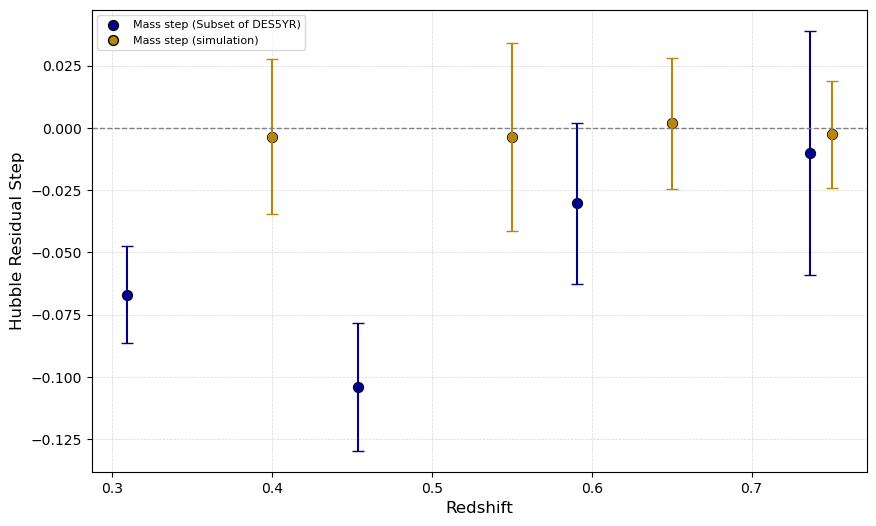

In [100]:
plt.figure(figsize=(10, 6))


# Plotting OzDES data
mass_data = [(reg1_z_med, mass_step_z_reg1), (reg2_z_med, mass_step_z_reg2), 
              (reg3_z_med, mass_step_z_reg3), (reg4_z_med, mass_step_z_reg4)]
for z_med, mass_step_z in mass_data:
    plt.scatter(z_med, mass_step_z, color='darkblue', s=50, edgecolor='black', label=r'Mass step (Subset of DES5YR)' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=[mass_step_err_z_reg1, mass_step_err_z_reg2, mass_step_err_z_reg3, mass_step_err_z_reg4][ozdes_data.index((z_med, mass_step_z))], 
                 fmt='o', color='darkblue', capsize=4)
    
# Plotting OzDES data
sim_mass_data = [
    (sim_reg1_z_med, sim_mass_step_z_reg1, sim_mass_step_err_z_reg1),
    (sim_reg2_z_med, sim_mass_step_z_reg2, sim_mass_step_err_z_reg2),
    (sim_reg3_z_med, sim_mass_step_z_reg3, sim_mass_step_err_z_reg3),
    (sim_reg4_z_med, sim_mass_step_z_reg4, sim_mass_step_err_z_reg4),
]

for sim_z_med, sim_mass_step_z, err in sim_mass_data:
    plt.scatter(sim_z_med, sim_mass_step_z, color='darkgoldenrod', s=50, edgecolor='black', label=r'Mass step (simulation)' if sim_z_med == sim_reg1_z_med else "")
    plt.errorbar(sim_z_med, sim_mass_step_z, yerr=err, fmt='o', color='darkgoldenrod', capsize=4, ls='--')

# Labels and title
plt.xlabel(r'Redshift', fontsize=12)
plt.ylabel(r'Hubble Residual Step', fontsize=12)
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
# Grid and legend
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8, loc='upper left')

# File saving process
file_pathz1 = 'mass_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)

# Save the plot as a PNG file
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()  # Show the plot

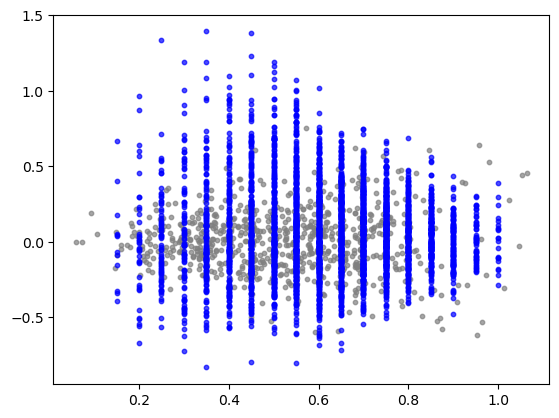

In [101]:
plt.scatter(df_merged['zHD'], df_merged['MURES'], s=10, color='gray', alpha=0.7, label='Simulated SNe Ia')
plt.scatter(df_output['zHD'], df_output['MURES'], s=10, color='blue', alpha=0.7, label='Simulated SNe Ia (after BBC)')



(array([0.11817227, 0.37421218, 0.        , 0.68933824, 0.        ,
        0.87644433, 0.        , 1.38852416, 1.68395483, 0.        ,
        2.24527311, 0.        , 2.74750525, 0.        , 3.70273109,
        3.91938025, 0.        , 3.81105567, 0.        , 3.86029412,
        0.        , 3.67318803, 2.34375   , 0.        , 2.03847164,
        0.        , 1.11278887, 0.        , 0.50223214, 0.20680147]),
 array([0.15      , 0.17833333, 0.20666667, 0.235     , 0.26333333,
        0.29166667, 0.32      , 0.34833333, 0.37666667, 0.405     ,
        0.43333333, 0.46166667, 0.49      , 0.51833333, 0.54666667,
        0.575     , 0.60333333, 0.63166667, 0.66      , 0.68833333,
        0.71666667, 0.745     , 0.77333333, 0.80166667, 0.83      ,
        0.85833333, 0.88666667, 0.915     , 0.94333333, 0.97166667,
        1.        ]),
 <BarContainer object of 30 artists>)

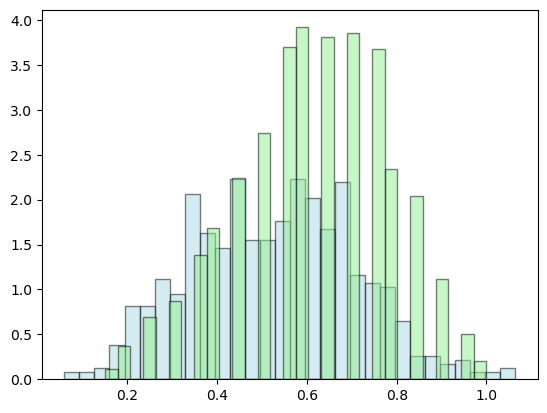

In [102]:
plt.hist(df_merged['zHD'], density=True,bins=30, alpha=0.5, label='Redshift Distribution (before BBC)', color='lightblue', edgecolor='black')
plt.hist(df_output['zHD'], density=True,bins=30, alpha=0.5, label='Redshift Distribution (after BBC)', color='lightgreen', edgecolor='black')

Number of SNe before BBC: 695
Number of SNe after BBC: 695


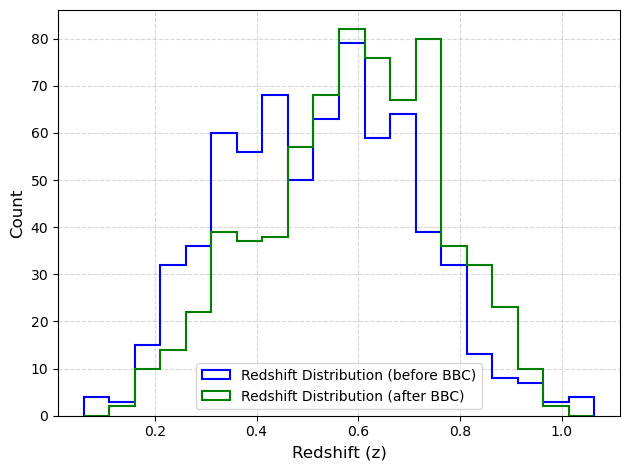

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Downsample df_output to 695 rows if it has more
if len(df_output) > 695:
    df_output_sampled = df_output.sample(n=695, random_state=42)
else:
    df_output_sampled = df_output

# Define common bin edges using combined min and max range
bin_edges = np.histogram_bin_edges(
    np.concatenate((df_merged['zHD'], df_output_sampled['zHD'])), bins=20)

# Plot histograms with the same bin edges and step style
plt.hist(df_merged['zHD'], bins=bin_edges, histtype='step', linewidth=1.5,
         label='Redshift Distribution (before BBC)', color='blue')

plt.hist(df_output_sampled['zHD'], bins=bin_edges, histtype='step', linewidth=1.5,
         label='Redshift Distribution (after BBC)', color='green')

# Print counts
print(f"Number of SNe before BBC: {len(df_merged)}")
print(f"Number of SNe after BBC: {len(df_output_sampled)}")

# Labels and formatting
plt.xlabel('Redshift (z)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


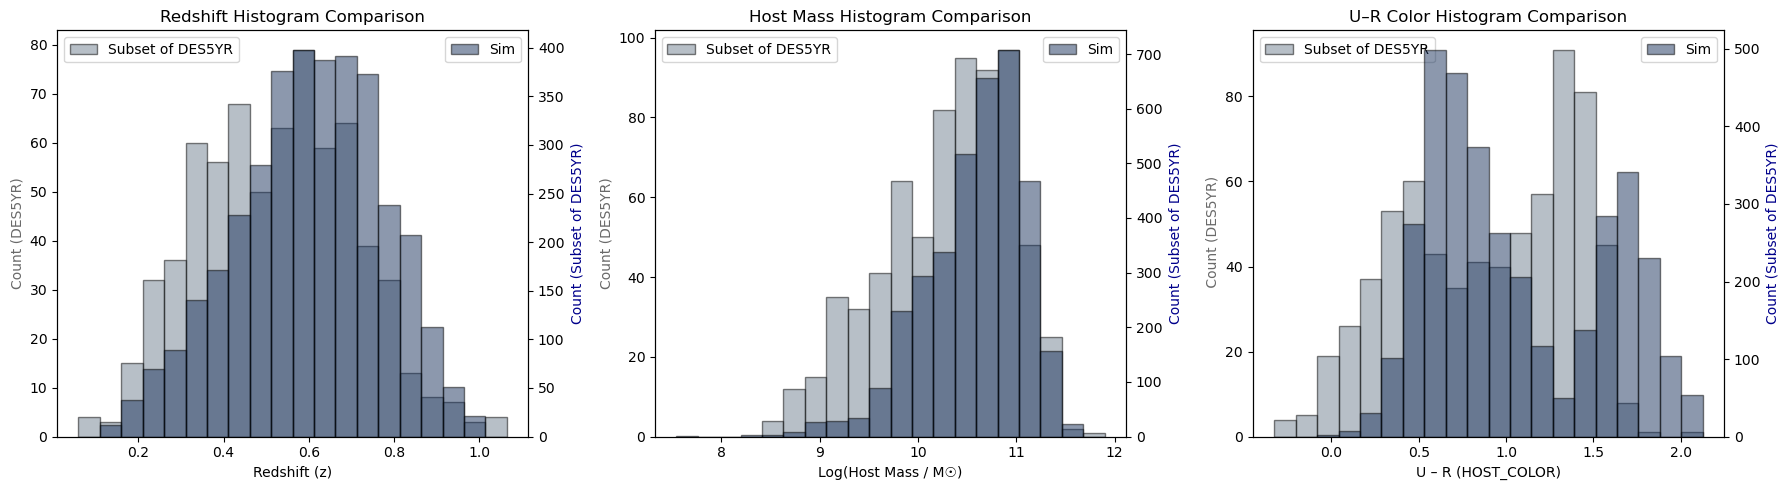

In [104]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Shared binning helper
def get_bins(data1, data2, bins=20):
    combined = pd.concat([data1, data2])
    return np.histogram_bin_edges(combined, bins=bins)

# Redshift
bins = get_bins(df_input['zHD'], df_merged['zHD'])
ax = axes[0]
counts1, _ = np.histogram(df_merged['zHD'], bins=bins)
counts2, _ = np.histogram(df_output['zHD'], bins=bins)
ax.bar(bins[:-1], counts1, width=np.diff(bins), align='edge', alpha=0.5, label='Subset of DES5YR', color='slategrey', edgecolor='black')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='Sim', color="#1A335D", edgecolor='black')
ax.set_xlabel('Redshift (z)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Subset of DES5YR)', color='darkblue')
ax.set_title('Redshift Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Host Mass
bins = get_bins(df_input['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
ax = axes[1]
counts1, _ = np.histogram(df_merged['HOST_LOGMASS'], bins=bins)
counts2, _ = np.histogram(df_output['HOST_LOGMASS'], bins=bins)
ax.bar(bins[:-1], counts1, width=np.diff(bins), align='edge', alpha=0.5, label='Subset of DES5YR', color='slategrey', edgecolor='black')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='Sim', color="#1A335D", edgecolor='black')
ax.set_xlabel('Log(Host Mass / M☉)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Subset of DES5YR)', color='darkblue')
ax.set_title('Host Mass Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# HOST_COLOR
bins = get_bins(df_input['U-R'], df_merged['HOST_COLOR'])
ax = axes[2]
counts1, _ = np.histogram(df_merged['HOST_COLOR'], bins=bins)
counts2, _ = np.histogram(df_output['U-R'], bins=bins)
ax.bar(bins[:-1], counts1 , width=np.diff(bins), align='edge', alpha=0.5, label='Subset of DES5YR', color='slategrey', edgecolor='black')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='Sim', color="#1A335D", edgecolor='black')
ax.set_xlabel('U – R (HOST_COLOR)')
ax.set_ylabel(' Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Subset of DES5YR)', color='darkblue')
ax.set_title('U–R Color Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.tight_layout()
plt.show()


[0.05962  0.109849 0.160078 0.210307 0.260536 0.310765 0.360994 0.411223
 0.461452 0.511681 0.56191  0.612139 0.662368 0.712597 0.762826 0.813055
 0.863284 0.913513 0.963742 1.013971 1.0642  ]


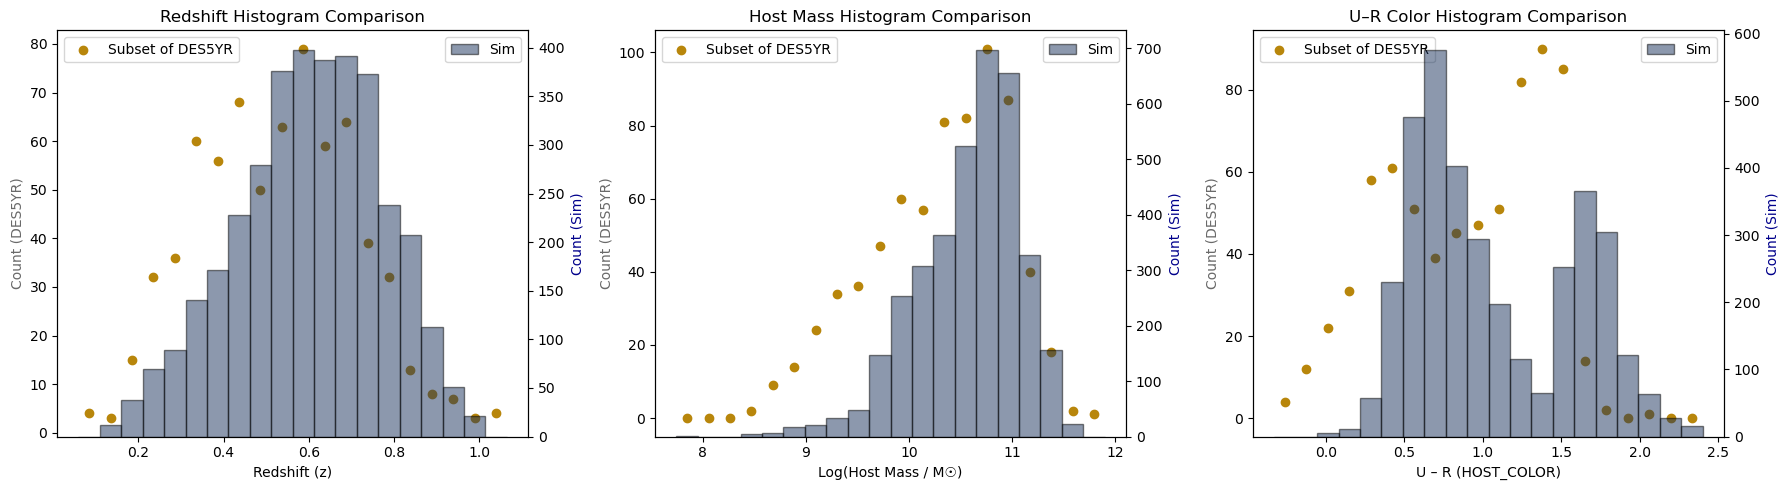

In [105]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Shared binning helper
def get_bins(data1, data2, bins=20):
    combined = pd.concat([data1, data2])
    return np.histogram_bin_edges(combined, bins=bins)

# Helper for bin centers
def get_bin_centers(bins):
    return (bins[:-1] + bins[1:]) / 2

# Redshift
bins = get_bins(df_output['zHD'], df_merged['zHD'])
print(bins)
centers = get_bin_centers(bins)
ax = axes[0]
counts1, _ = np.histogram(df_merged['zHD'], bins=bins)
counts2, _ = np.histogram(df_output['zHD'], bins=bins)
# Plot subset as points
ax.scatter(centers, counts1, label='Subset of DES5YR', color='darkgoldenrod')
# Plot sim as bars
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='Sim', color="#1A335D", edgecolor='black')
ax.set_xlabel('Redshift (z)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('Redshift Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Host Mass
bins = get_bins(df_output['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
centers = get_bin_centers(bins)
ax = axes[1]
counts1, _ = np.histogram(df_merged['HOST_LOGMASS'], bins=bins)
counts2, _ = np.histogram(df_output['HOST_LOGMASS'], bins=bins)
ax.scatter(centers, counts1, label='Subset of DES5YR', color='darkgoldenrod')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='Sim', color="#1A335D", edgecolor='black')
ax.set_xlabel('Log(Host Mass / M☉)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('Host Mass Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# HOST_COLOR
bins = get_bins(df_output['U-R'], df_merged['HOST_COLOR'])
centers = get_bin_centers(bins)
ax = axes[2]
counts1, _ = np.histogram(df_merged['HOST_COLOR'], bins=bins)
counts2, _ = np.histogram(df_output['U-R'], bins=bins)
ax.scatter(centers, counts1 , label='Subset of DES5YR', color='darkgoldenrod')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='Sim', color="#1A335D", edgecolor='black')
ax.set_xlabel('U – R (HOST_COLOR)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('U–R Color Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



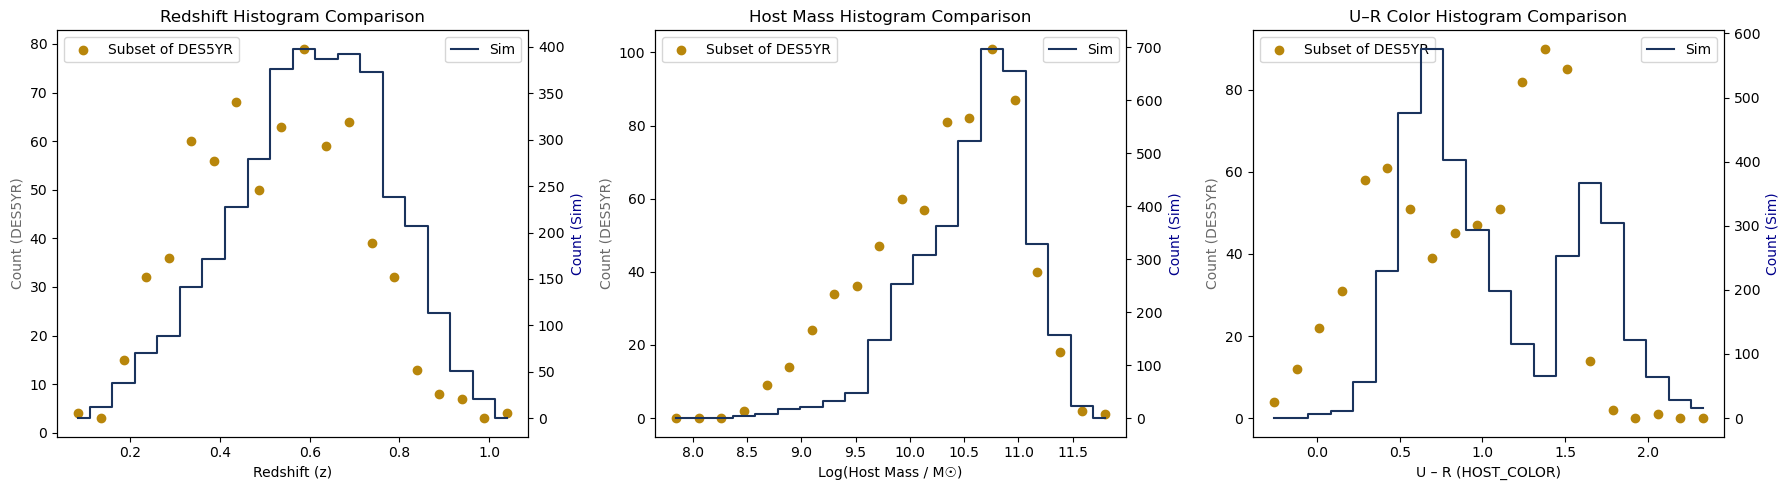

In [106]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Shared binning helper
def get_bins(data1, data2, bins=20):
    combined = pd.concat([data1, data2])
    return np.histogram_bin_edges(combined, bins=bins)

# Helper for bin centers
def get_bin_centers(bins):
    return (bins[:-1] + bins[1:]) / 2

# Redshift
bins = get_bins(df_output['zHD'], df_merged['zHD'])
centers = get_bin_centers(bins)
ax = axes[0]
counts1, _ = np.histogram(df_merged['zHD'], bins=bins)
counts2, _ = np.histogram(df_output['zHD'], bins=bins)
ax.scatter(centers, counts1, label='Subset of DES5YR', color='darkgoldenrod')
ax2 = ax.twinx()
ax2.step(centers, counts2, where='mid', label='Sim', color="#1A335D")
ax.set_xlabel('Redshift (z)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('Redshift Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Host Mass
bins = get_bins(df_output['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
centers = get_bin_centers(bins)
ax = axes[1]
counts1, _ = np.histogram(df_merged['HOST_LOGMASS'], bins=bins)
counts2, _ = np.histogram(df_output['HOST_LOGMASS'], bins=bins)
ax.scatter(centers, counts1, label='Subset of DES5YR', color='darkgoldenrod')
ax2 = ax.twinx()
ax2.step(centers, counts2, where='mid', label='Sim', color="#1A335D")
ax.set_xlabel('Log(Host Mass / M☉)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('Host Mass Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# HOST_COLOR
bins = get_bins(df_output['U-R'], df_merged['HOST_COLOR'])
centers = get_bin_centers(bins)
ax = axes[2]
counts1, _ = np.histogram(df_merged['HOST_COLOR'], bins=bins)
counts2, _ = np.histogram(df_output['U-R'], bins=bins)
ax.scatter(centers, counts1 , label='Subset of DES5YR', color='darkgoldenrod')
ax2 = ax.twinx()
ax2.step(centers, counts2, where='mid', label='Sim', color="#1A335D")
ax.set_xlabel('U – R (HOST_COLOR)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('U–R Color Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


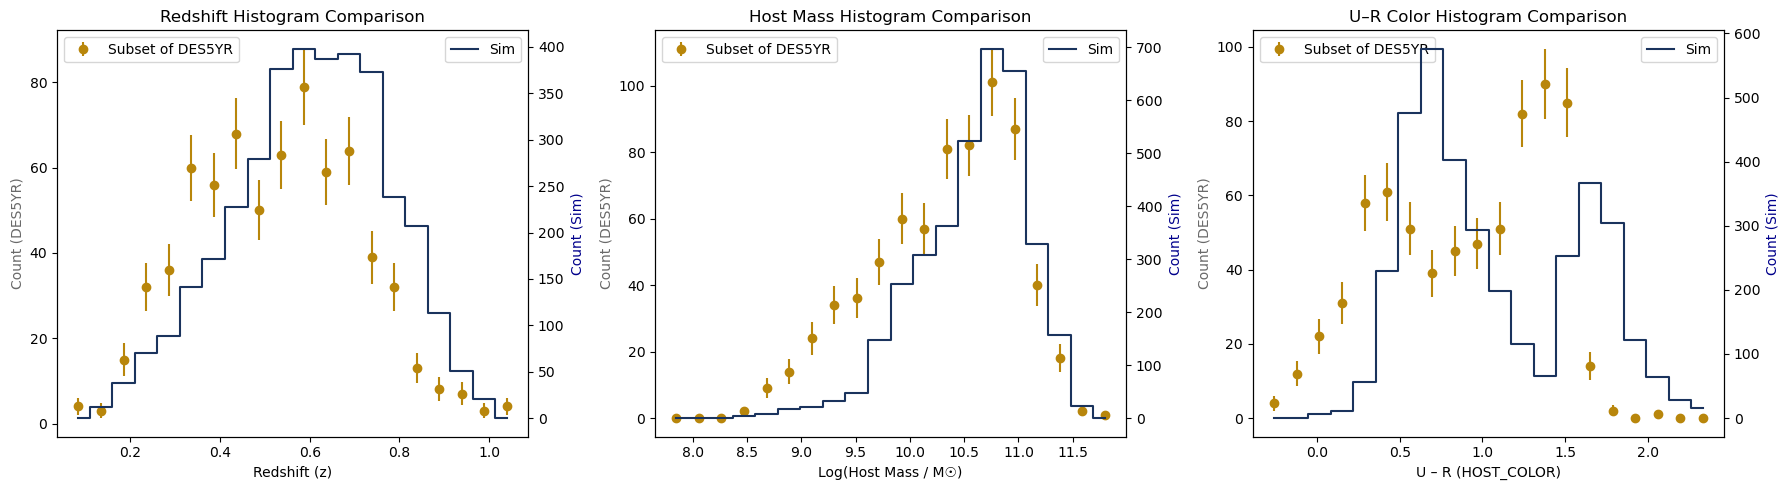

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Shared binning helper
def get_bins(data1, data2, bins=20):
    combined = pd.concat([data1, data2])
    return np.histogram_bin_edges(combined, bins=bins)

# Helper for bin centers
def get_bin_centers(bins):
    return (bins[:-1] + bins[1:]) / 2

# Panel 1: Redshift
bins = get_bins(df_output['zHD'], df_merged['zHD'])
centers = get_bin_centers(bins)
ax = axes[0]
counts1, _ = np.histogram(df_merged['zHD'], bins=bins)
errors1 = np.sqrt(counts1)
counts2, _ = np.histogram(df_output['zHD'], bins=bins)
ax.errorbar(centers, counts1, yerr=errors1, fmt='o', color='darkgoldenrod', label='Subset of DES5YR')
ax2 = ax.twinx()
ax2.step(centers, counts2, where='mid', label='Sim', color="#1A335D")
ax.set_xlabel('Redshift (z)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('Redshift Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Panel 2: Host Mass
bins = get_bins(df_output['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
centers = get_bin_centers(bins)
ax = axes[1]
counts1, _ = np.histogram(df_merged['HOST_LOGMASS'], bins=bins)
errors1 = np.sqrt(counts1)
counts2, _ = np.histogram(df_output['HOST_LOGMASS'], bins=bins)
ax.errorbar(centers, counts1, yerr=errors1, fmt='o', color='darkgoldenrod', label='Subset of DES5YR')
ax2 = ax.twinx()
ax2.step(centers, counts2, where='mid', label='Sim', color="#1A335D")
ax.set_xlabel('Log(Host Mass / M☉)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('Host Mass Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Panel 3: U–R Color
bins = get_bins(df_output['U-R'], df_merged['HOST_COLOR'])
centers = get_bin_centers(bins)
ax = axes[2]
counts1, _ = np.histogram(df_merged['HOST_COLOR'], bins=bins)
errors1 = np.sqrt(counts1)
counts2, _ = np.histogram(df_output['U-R'], bins=bins)
ax.errorbar(centers, counts1, yerr=errors1, fmt='o', color='darkgoldenrod', label='Subset of DES5YR')
ax2 = ax.twinx()
ax2.step(centers, counts2, where='mid', label='Sim', color="#1A335D")
ax.set_xlabel('U – R (HOST_COLOR)')
ax.set_ylabel('Count (DES5YR)', color='dimgrey')
ax2.set_ylabel('Count (Sim)', color='darkblue')
ax.set_title('U–R Color Histogram Comparison')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
